<a href="https://colab.research.google.com/github/Rictabrity/HealthCare_lab/blob/main/Final_project_preperation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


if we check the last year growth of xrays https://www.rcsb.org/stats/growth/growth-xray . It is almost 195939 till 2025.

Enteries merged is Entries after merge: 195014

In [2]:
import pandas as pd

# Load both datasets
df1 = pd.read_csv(r'/content/drive/MyDrive/ML assessment/Ml 2/rr/coco.csv')
df2 = pd.read_csv(r'/content/drive/MyDrive/ML assessment/Ml 2/rr/new_validation_metrics.csv')

# Original counts
count_df1 = len(df1)
count_df2 = len(df2)

# Merge on PDB_ID
merged_df = pd.merge(df1, df2, on='PDB_ID', how='inner')
count_merged = len(merged_df)

# Entries removed
removed_from_df1 = count_df1 - count_merged
removed_from_df2 = count_df2 - count_merged

# Save merged file
merged_df.to_excel('/content/drive/MyDrive/ML assessment/Ml 2/rr/merged_new.xlsx', index=False)

# Identify and save removed PDB_IDs
df1_ids = set(df1['PDB_ID'])
df2_ids = set(df2['PDB_ID'])
merged_ids = set(merged_df['PDB_ID'])

# From df1 not in merged
removed_ids_df1 = df1_ids - merged_ids
removed_df1 = df1[df1['PDB_ID'].isin(removed_ids_df1)]
removed_df1.to_csv('/content/drive/MyDrive/ML assessment/Ml 2/rr/removed_from_df1.csv', index=False)

# From df2 not in merged
removed_ids_df2 = df2_ids - merged_ids
removed_df2 = df2[df2['PDB_ID'].isin(removed_ids_df2)]
removed_df2.to_csv('/content/drive/MyDrive/ML assessment/Ml 2/rr/removed_from_df2.csv', index=False)

# Save summary to text file
with open('/content/drive/MyDrive/ML assessment/Ml 2/rr/merge_summary.txt', 'w') as f:
    f.write(f"Entries in df1 (complete_data_1.csv): {count_df1}\n")
    f.write(f"Entries in df2 (new_validation_metrics.csv): {count_df2}\n")
    f.write(f"Entries after merge: {count_merged}\n")
    f.write(f"Removed from df1: {removed_from_df1}\n")
    f.write(f"Removed from df2: {removed_from_df2}\n")


In [13]:
import pandas as pd
# Path to your Excel file
file_path = '/content/drive/MyDrive/ML assessment/Ml 2/rr/complete_data_wts.xlsx'

# Read the first sheet by default
df = pd.read_excel(file_path)

# Count missing values per column
missing_counts = df.isnull().sum()

# Filter only columns with missing data
missing_counts = missing_counts[missing_counts > 0]

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Total Rows': len(df),
    'Percent Missing': 100 * missing_counts / len(df)
}).sort_values(by='Percent Missing', ascending=False)

print("Columns with missing data:")
print(missing_summary)


Columns with missing data:
                  Missing Count  Total Rows  Percent Missing
DataCompleteness          12385      195014         6.350826
temperature               10750      195014         5.512425
WilsonBestimate           10714      195014         5.493965
r_free                     6109      195014         3.132596
r_work                     3408      195014         1.747567
Solvent_content            2401      195014         1.231194
resolution                    1      195014         0.000513


In [15]:
import pandas as pd
import os


# Step 1: Load your dataset (update path if needed)
df = pd.read_excel("/content/drive/MyDrive/ML assessment/Ml 2/rr/complete_data_wts.xlsx")

# Step 2: Check total rows before cleaning
total_rows_before = len(df)

# Step 3: Drop rows with any missing values
df_cleaned = df.dropna()

# Step 4: Check total rows after cleaning
total_rows_after = len(df_cleaned)

# Step 5: Calculate how many rows were deleted and percentage
rows_deleted = total_rows_before - total_rows_after
percent_deleted = 100 * rows_deleted / total_rows_before

print(f"Rows before cleaning: {total_rows_before}")
print(f"Rows after cleaning: {total_rows_after}")
print(f"Rows deleted: {rows_deleted} ({percent_deleted:.2f}%)")

# Step 6: Save cleaned data to Excel file
output_path = "/content/drive/MyDrive/ML assessment/Ml 2/rr/cleaned_data.xlsx"
df_cleaned.to_excel(output_path, index=False)
print(f"Cleaned data saved to: {os.path.abspath(output_path)}")


Rows before cleaning: 195014
Rows after cleaning: 171120
Rows deleted: 23894 (12.25%)
Cleaned data saved to: /content/drive/MyDrive/ML assessment/Ml 2/rr/cleaned_data.xlsx


In [22]:
# Drop all rows with any missing values
# Path to your Excel file
file_path = '/content/drive/MyDrive/ML assessment/Ml 2/rr/complete_data_wts.xlsx'

# Read the first sheet by default
df = pd.read_excel(file_path)
df.dropna().to_excel('cleaned_data.xlsx', index=False)



What are we trying to do here:- We are building evidence that entries with suspicious R_free - R_work are also different in other ways — which supports the idea that our flagging is meaningful, not random.

This is like validating your outlier detection logic by showing those outliers have real, measurable differences in biological/structural properties.

lets understand "Are the entries I flagged actually different — and probably lower quality — than the others?"

Crystallographic Structure Quality Analysis Report

##Dataset Overview

Total structures analyzed: 171,120

Flagged entries (suspicious Rfree–Rwork difference): 549

Percentage of flagged entries: 0.32%

This indicates a generally high-quality dataset, with only a small subset of structures showing signs of potential issues.

## Key Findings

1. Resolution Quality

Valid entries average resolution: 2.11 Å

Flagged entries average resolution: 2.77 Å

Interpretation: Flagged entries tend to have poorer resolution, meaning less precise atomic positioning.

2. Data Completeness

Valid entries: 95.7% complete

Flagged entries: 90.3% complete

Interpretation: Incomplete data may contribute to inaccurate model refinement.

3. Wilson B-Factor Estimate (Disorder)

Valid average: 34.7

Flagged average: 57.0

Interpretation: Flagged structures show more atomic disorder and lower stability.

4. Cell Volume and Atom Count

Flagged structures have larger average unit cell volumes and more atoms, indicating:

Larger, more complex structures

Potentially higher difficulty in crystallization or refinement

5. Residue Count Variability

Similar average count, but flagged entries show higher variation, suggesting inconsistency in structural complexity.

6. Temperature of Data Collection

Valid entries average: 109.5 K

Flagged entries average: 137.5 K

Interpretation: Higher temperatures may reduce crystal stability and model quality.

##Conclusion

Structures flagged for suspicious Rfree–Rwork differences tend to:

Be more complex and disordered

Be collected at higher temperatures

Have lower resolution and completeness

These characteristi

Total entries: 171120
Suspicious Rfree–Rwork cases: 549
Percentage of dataset: 0.32%

Comparison between valid and flagged entries:
flag_invalid                   False         True 
resolution       count  1.705710e+05  5.490000e+02
                 mean   2.106389e+00  2.771654e+00
                 std    5.830346e-01  9.395586e-01
                 min    4.800000e-01  7.600000e-01
                 25%    1.700000e+00  2.300000e+00
                 50%    2.000000e+00  2.600000e+00
                 75%    2.450000e+00  3.000000e+00
                 max    9.700000e+00  8.590000e+00
Solvent_content  count  1.705710e+05  5.490000e+02
                 mean   5.117017e+01  4.874361e+01
                 std    1.005129e+01  1.047089e+01
                 min    0.000000e+00  6.700000e-01
                 25%    4.417000e+01  4.283000e+01
                 50%    5.027000e+01  4.746000e+01
                 75%    5.735000e+01  5.404000e+01
                 max    9.606000e+01  9.284000e+01
c

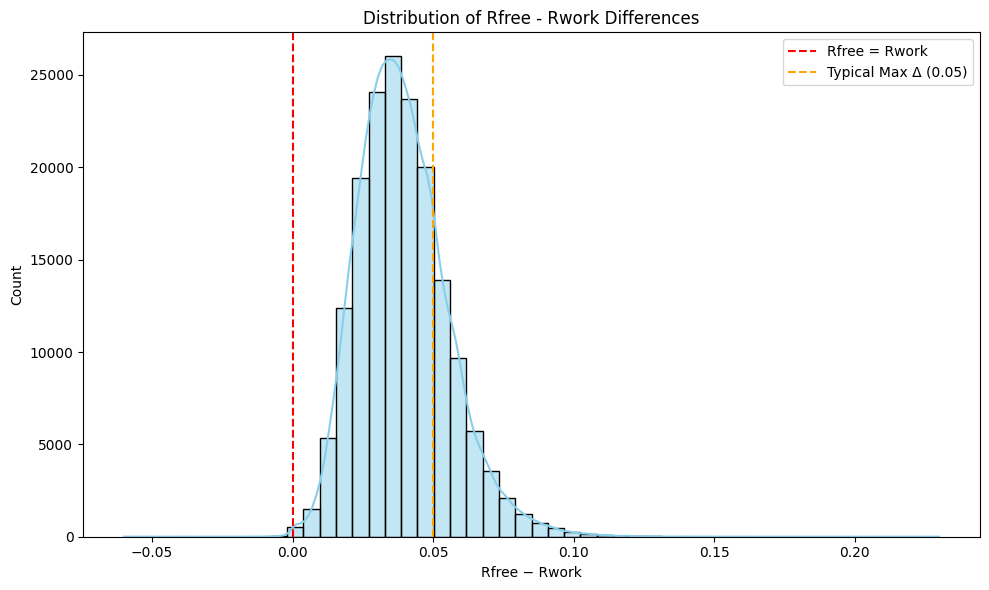

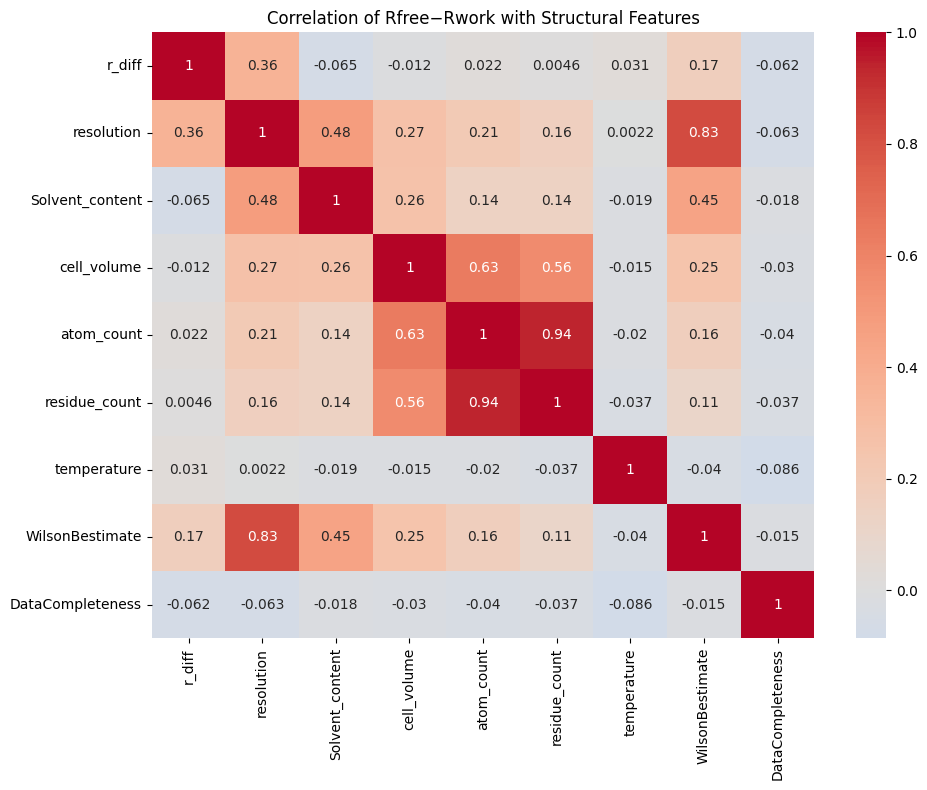

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace with your actual file)
df = pd.read_excel("/content/drive/MyDrive/ML assessment/Ml 2/rr/cleaned_data.xlsx")


# Step 1: Compute Rfree - Rwork difference
df["r_diff"] = df["r_free"] - df["r_work"]

# Step 2: Flag suspicious entries
df["flag_invalid"] = False
df.loc[(df["r_free"] < df["r_work"]) | (df["r_diff"] < 0), "flag_invalid"] = True
df.loc[df["r_diff"] > 0.1, "flag_invalid"] = True  # Optional: flag very high differences too

# Step 3: Print summary statistics
print(f"Total entries: {len(df)}")
print(f"Suspicious Rfree–Rwork cases: {df['flag_invalid'].sum()}")
print(f"Percentage of dataset: {100 * df['flag_invalid'].mean():.2f}%")

# Step 4: Compare statistics between valid and suspicious entries
numeric_cols = ['resolution', 'Solvent_content',
                'cell_volume', 'atom_count', 'residue_count','temperature','WilsonBestimate','DataCompleteness']

summary = df.groupby("flag_invalid")[numeric_cols].describe().transpose()
print("\nComparison between valid and flagged entries:")
print(summary)

# Step 5: Visualize the differences
plt.figure(figsize=(10, 6))
sns.histplot(df["r_diff"], bins=50, kde=True, color="skyblue")
plt.axvline(0.0, color='red', linestyle='--', label='Rfree = Rwork')
plt.axvline(0.05, color='orange', linestyle='--', label='Typical Max Δ (0.05)')
plt.title("Distribution of Rfree - Rwork Differences")
plt.xlabel("Rfree − Rwork")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Correlation heatmap to see how r_diff relates to other features
plt.figure(figsize=(10, 8))
corr_df = df[~df['flag_invalid']]  # Only valid rows
sns.heatmap(corr_df[['r_diff'] + numeric_cols].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Rfree−Rwork with Structural Features")
plt.tight_layout()
plt.show()


✅ Total entries: 171120
⚠️ Suspicious Rfree–Rwork cases: 549
📊 Percentage of dataset flagged as suspicious: 0.32%

📌 Comparison of Feature Means (Valid vs Flagged Entries) [values & % diff]:
                  Valid Entries Mean  Flagged Entries Mean  Difference (%)
resolution                      2.11                  2.77           31.58
Solvent_content                51.17                 48.74           -4.74
cell_volume               1294653.05            1884032.18           45.52
atom_count                   6854.67               7493.66            9.32
residue_count                1049.27               1000.62           -4.64
temperature                   109.47                137.46           25.57
WilsonBestimate                34.69                 57.01           64.36
DataCompleteness               95.67                 90.33           -5.58
r_diff                          0.04                  0.09          131.69

📈 Average of Means for Valid Entries: 144761.13


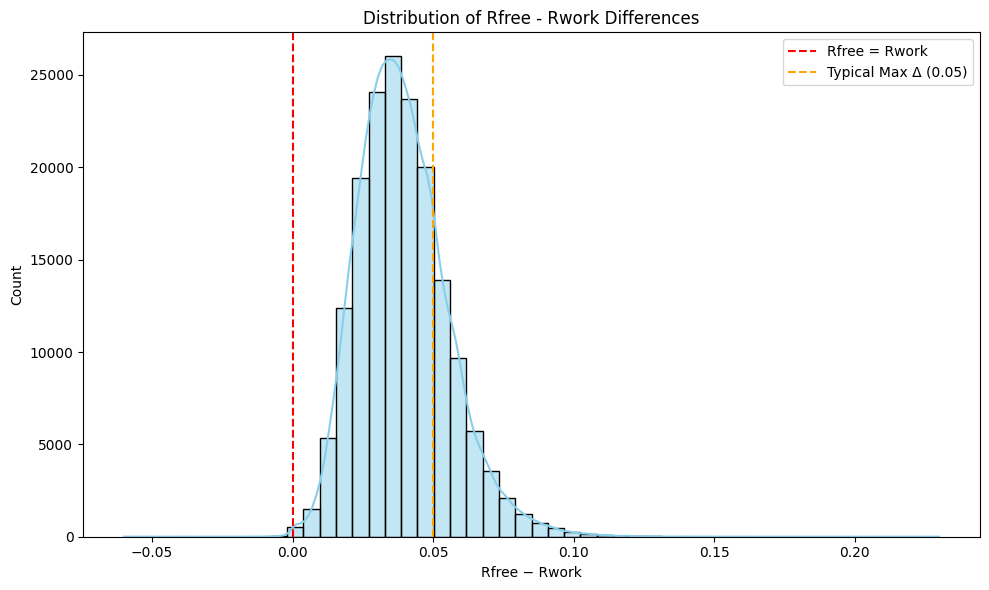

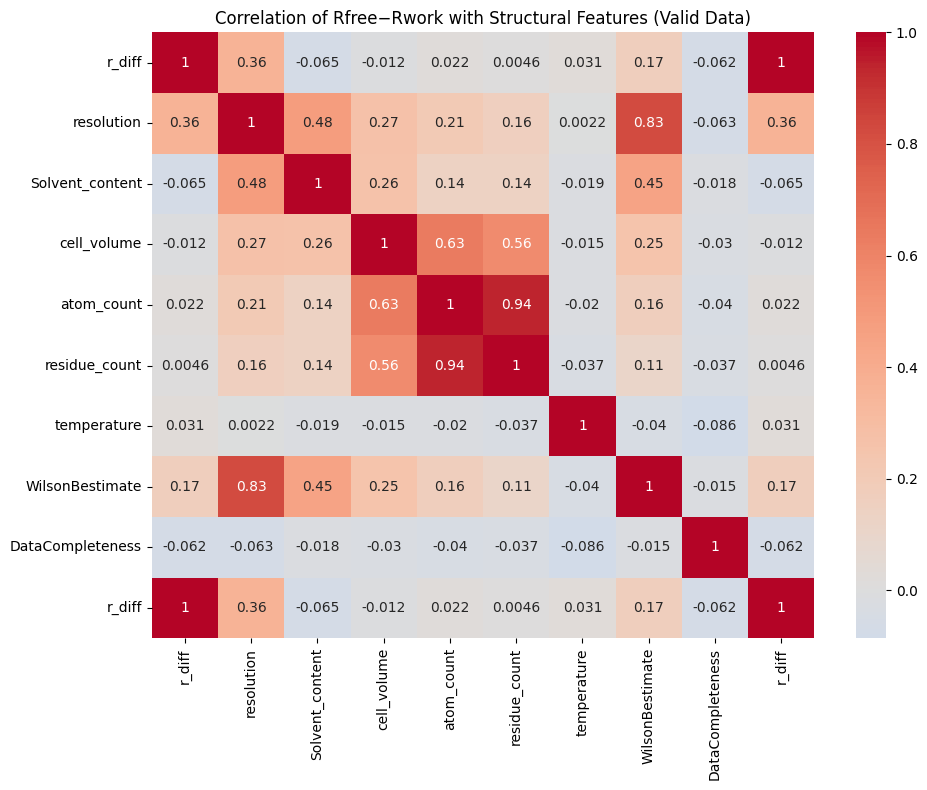

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_excel("/content/drive/MyDrive/ML assessment/Ml 2/rr/cleaned_data.xlsx")

# Step 1: Compute Rfree - Rwork difference
df["r_diff"] = df["r_free"] - df["r_work"]

# Step 2: Flag suspicious entries
df["flag_invalid"] = False
df.loc[(df["r_free"] < df["r_work"]) | (df["r_diff"] < 0), "flag_invalid"] = True
df.loc[df["r_diff"] > 0.1, "flag_invalid"] = True  # Flag very high differences

# Step 3: Print summary statistics
total_entries = len(df)
suspicious_count = df["flag_invalid"].sum()
suspicious_pct = 100 * df["flag_invalid"].mean()

print(f"✅ Total entries: {total_entries}")
print(f"⚠️ Suspicious Rfree–Rwork cases: {suspicious_count}")
print(f"📊 Percentage of dataset flagged as suspicious: {suspicious_pct:.2f}%")

# Step 4: Compare feature means between valid and suspicious entries
numeric_cols = ['resolution', 'Solvent_content',
                'cell_volume', 'atom_count', 'residue_count', 'temperature',
                'WilsonBestimate', 'DataCompleteness', 'r_diff']

# ✅ FIX: Use groupby().mean() instead of describe() for simplicity
means = df.groupby("flag_invalid")[numeric_cols].mean().transpose()
means.columns = ['Valid Entries Mean', 'Flagged Entries Mean']

# Compute relative difference
means['Difference (%)'] = 100 * (
    means['Flagged Entries Mean'] - means['Valid Entries Mean']
) / means['Valid Entries Mean']

# Display comparison
print("\n📌 Comparison of Feature Means (Valid vs Flagged Entries) [values & % diff]:")
print(means.round(2))

# Step 5: Mean of Means – General average of valid means
valid_means = means['Valid Entries Mean']
overall_valid_mean_of_means = valid_means.mean()
print(f"\n📈 Average of Means for Valid Entries: {overall_valid_mean_of_means:.2f}")

# Step 6: Visualize Rfree - Rwork Differences
plt.figure(figsize=(10, 6))
sns.histplot(df["r_diff"], bins=50, kde=True, color="skyblue")
plt.axvline(0.0, color='red', linestyle='--', label='Rfree = Rwork')
plt.axvline(0.05, color='orange', linestyle='--', label='Typical Max Δ (0.05)')
plt.title("Distribution of Rfree - Rwork Differences")
plt.xlabel("Rfree − Rwork")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# Step 7: Correlation heatmap (valid entries only)
plt.figure(figsize=(10, 8))
corr_df = df[~df['flag_invalid']]
corr_matrix = corr_df[['r_diff'] + numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Rfree−Rwork with Structural Features (Valid Data)")
plt.tight_layout()
plt.show()


📊 Rfree − Rwork Summary Statistics:
 count    171120.0000
mean          0.0393
std           0.0162
min          -0.0600
25%           0.0280
50%           0.0378
75%           0.0489
max           0.2300
Name: r_diff, dtype: float64

⚠️ Suspicious cases: 549 of 171120 (0.32%)


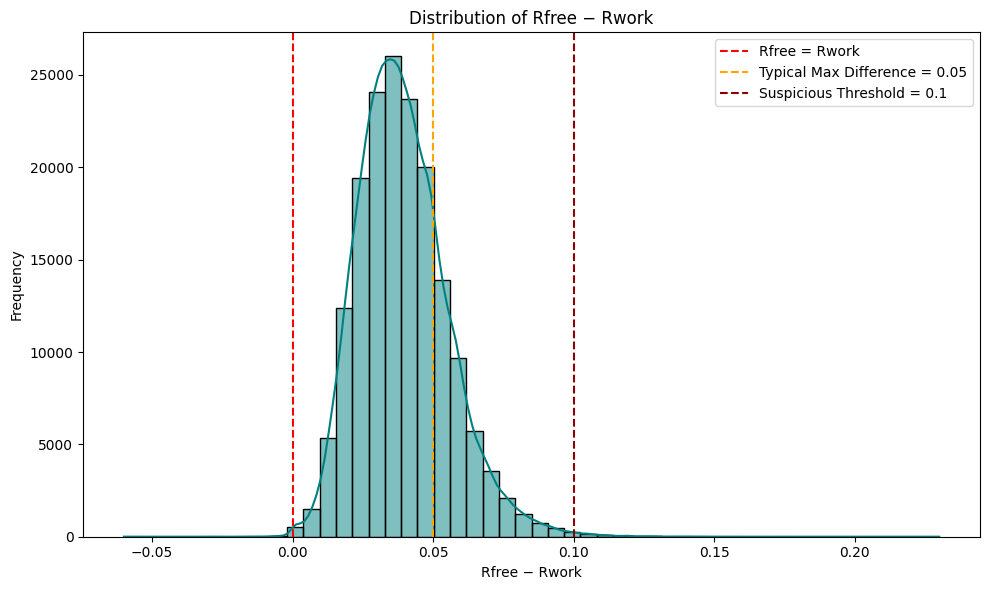

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel("/content/drive/MyDrive/ML assessment/Ml 2/rr/cleaned_data.xlsx")

# 1️⃣ Compute the difference
df["r_diff"] = df["r_free"] - df["r_work"]

# 2️⃣ Flag suspicious entries
df["flag_invalid"] = False
df.loc[df["r_diff"] < 0, "flag_invalid"] = True   # Rfree should not be < Rwork
df.loc[df["r_diff"] > 0.1, "flag_invalid"] = True  # Large difference is suspicious

# 3️⃣ Summary statistics of the difference
diff_stats = df["r_diff"].describe()
print("📊 Rfree − Rwork Summary Statistics:\n", diff_stats.round(4))

# 4️⃣ Count of flagged cases
total = len(df)
flagged = df["flag_invalid"].sum()
print(f"\n⚠️ Suspicious cases: {flagged} of {total} ({100 * flagged/total:.2f}%)")

# 5️⃣ Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df["r_diff"], bins=50, kde=True, color='teal', edgecolor='black')
plt.axvline(0.0, color='red', linestyle='--', label='Rfree = Rwork')
plt.axvline(0.05, color='orange', linestyle='--', label='Typical Max Difference = 0.05')
plt.axvline(0.1, color='darkred', linestyle='--', label='Suspicious Threshold = 0.1')
plt.title("Distribution of Rfree − Rwork")
plt.xlabel("Rfree − Rwork")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# Expand display settings to avoid truncation
pd.set_option('display.max_rows', None)       # Show all rows
pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.width', 1000)          # Wider display
pd.set_option('display.max_colwidth', None)   # Don't truncate cell content

print(summary)


flag_invalid                   False         True 
resolution       count  1.705710e+05  5.490000e+02
                 mean   2.106389e+00  2.771654e+00
                 std    5.830346e-01  9.395586e-01
                 min    4.800000e-01  7.600000e-01
                 25%    1.700000e+00  2.300000e+00
                 50%    2.000000e+00  2.600000e+00
                 75%    2.450000e+00  3.000000e+00
                 max    9.700000e+00  8.590000e+00
Solvent_content  count  1.705710e+05  5.490000e+02
                 mean   5.117017e+01  4.874361e+01
                 std    1.005129e+01  1.047089e+01
                 min    0.000000e+00  6.700000e-01
                 25%    4.417000e+01  4.283000e+01
                 50%    5.027000e+01  4.746000e+01
                 75%    5.735000e+01  5.404000e+01
                 max    9.606000e+01  9.284000e+01
cell_volume      count  1.705710e+05  5.490000e+02
                 mean   1.294653e+06  1.884032e+06
                 std    4.01676

lets now remove the suspisious data:-

In [ ]:
# Only keep valid (not flagged) entries
df_cleaned = df[~df["flag_invalid"]].copy()

# Confirm the size after cleaning
print(f"✅ Cleaned dataset size: {len(df_cleaned)} entries (removed {df['flag_invalid'].sum()} suspicious rows)")

# (Optional) Save the cleaned data to a new file
df_cleaned.to_excel("/content/drive/MyDrive/ML assessment/Ml 2/rr/cleaned_no_suspicious.xlsx", index=False)


✅ Cleaned dataset size: 170571 entries (removed 549 suspicious rows)


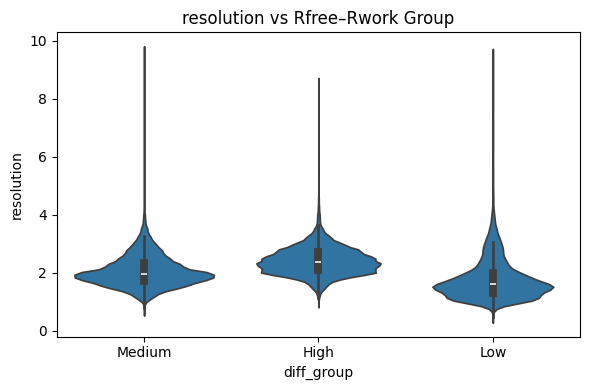

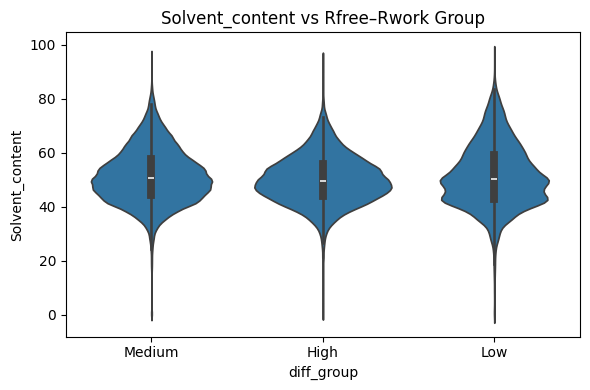

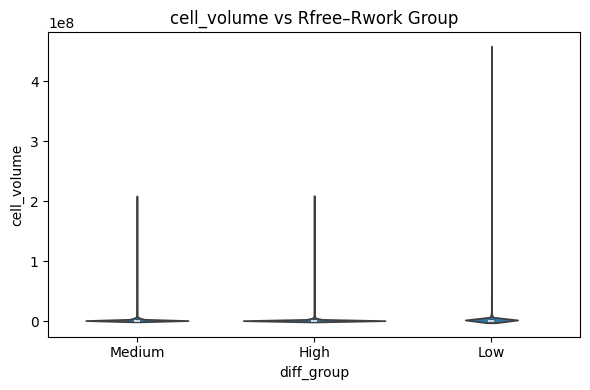

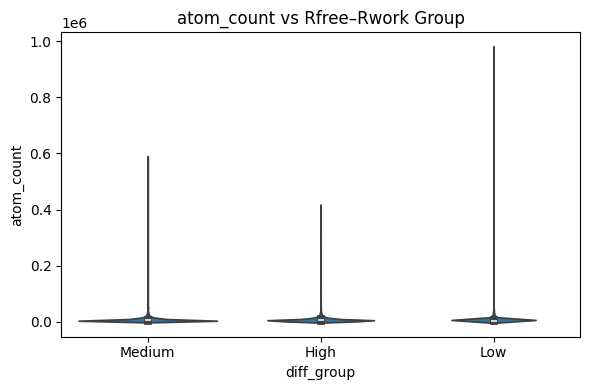

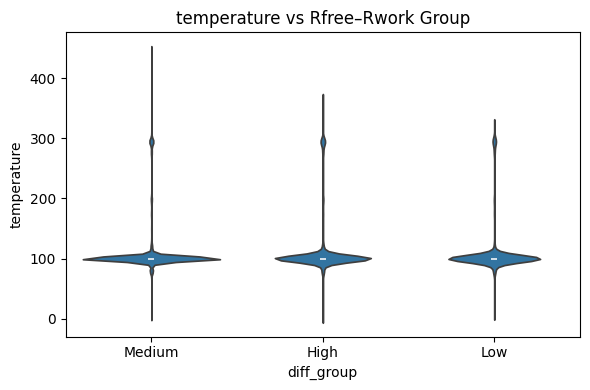

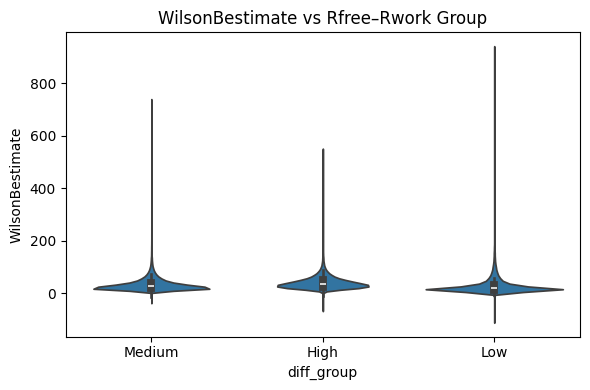

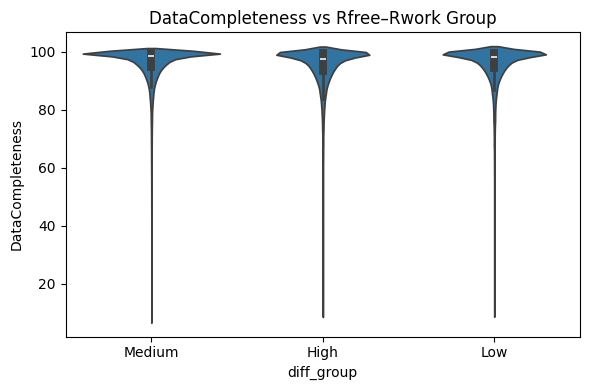

 Full dataset:
Full Dataset — MAE: 0.0195, R²: 0.5767

 Cleaned dataset (r_diff < 0.05):
Cleaned Dataset — MAE: 0.0181, R²: 0.5749


In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 0: Load your dataset
df = pd.read_excel('/content/drive/MyDrive/ML assessment/Ml 2/rr/cleaned_data.xlsx')

#  Step 1: Compute r_diff
df['r_diff'] = df['r_free'] - df['r_work']

#  Step 2: Classify r_diff into bins
def classify_diff(r):
    if r < 0.02:
        return 'Low'
    elif r < 0.05:
        return 'Medium'
    else:
        return 'High'

df['diff_group'] = df['r_diff'].apply(classify_diff)

#  Step 3: Visualize how r_diff groups affect structural features
features = ['resolution', 'Solvent_content', 'cell_volume','atom_count', 'temperature', 'WilsonBestimate','DataCompleteness']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=df, x='diff_group', y=feature)
    plt.title(f"{feature} vs Rfree–Rwork Group")
    plt.tight_layout()
    plt.show()

#  Step 4: Define ML modeling function
def train_and_evaluate(data, label):
    X_features = ['resolution', 'Solvent_content', 'cell_volume', 'temperature', 'WilsonBestimate']
    target = 'r_free'  # or 'r_work'

    X = data[X_features].copy()
    y = data[target].copy()

    # Drop rows with NaNs
    X = X.dropna()
    y = y.loc[X.index]

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{label} — MAE: {mae:.4f}, R²: {r2:.4f}")
    return model

#  Step 5: Train model on full dataset
print(" Full dataset:")
model_full = train_and_evaluate(df, "Full Dataset")

#  Step 6: Train model on cleaned (low/medium r_diff only) dataset
df_clean = df[df['r_diff'] < 0.05]
print("\n Cleaned dataset (r_diff < 0.05):")
model_clean = train_and_evaluate(df_clean, "Cleaned Dataset")


RMSE: 0.025018109915922945
R^2: 0.591573229510718

 Comparing model vs shell-median baseline — Full Dataset — Target: r_free


/tmp/ipython-input-59-1823172924.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shell_medians = df.groupby('resolution_bin')[target].median()
/tmp/ipython-input-59-1823172924.py:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_errors = df.groupby('resolution_bin').apply(
/tmp/ipython-input-59-1823172924.py:82: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping c

 Model MAE:        0.0126
 Shell Median MAE: 0.0223

MAE by resolution bin:
                MAE_model  MAE_shell
resolution_bin                      
(0.0, 0.5]       0.007929   0.000000
(0.5, 1.0]       0.011460   0.020876
(1.0, 1.5]       0.013469   0.023067
(1.5, 2.0]       0.012619   0.021770
(2.0, 2.5]       0.012065   0.021617
(2.5, 3.0]       0.011920   0.021999
(3.0, 3.5]       0.013898   0.025464
(3.5, 4.0]       0.017428   0.032000
(4.0, 4.5]       0.020224   0.034598
(4.5, 5.0]       0.020817   0.042678
(5.0, 5.5]       0.020063   0.043627
(5.5, 6.0]       0.022835   0.038724
(6.0, 6.5]       0.029802   0.061264
(6.5, 7.0]       0.027210   0.045993
(7.0, 7.5]       0.020732   0.059609
(7.5, 8.0]       0.026172   0.065559
(8.0, 8.5]       0.018475   0.061700
(8.5, 9.0]       0.051262   0.079450
(9.0, 9.5]       0.058919   0.132425
(9.5, 10.0]      0.027471   0.000000


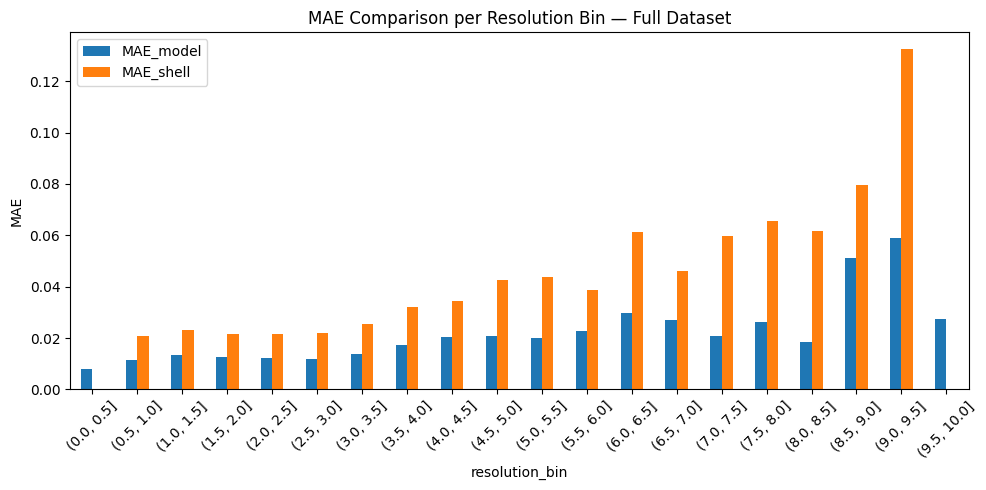


 Comparing model vs shell-median baseline — Cleaned Dataset — Target: r_free


/tmp/ipython-input-59-1823172924.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shell_medians = df.groupby('resolution_bin')[target].median()
/tmp/ipython-input-59-1823172924.py:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_errors = df.groupby('resolution_bin').apply(
/tmp/ipython-input-59-1823172924.py:82: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping c

 Model MAE:        0.0126
 Shell Median MAE: 0.0223

MAE by resolution bin:
                MAE_model  MAE_shell
resolution_bin                      
(0.0, 0.5]       0.007929   0.000000
(0.5, 1.0]       0.011460   0.020876
(1.0, 1.5]       0.013469   0.023067
(1.5, 2.0]       0.012619   0.021770
(2.0, 2.5]       0.012065   0.021617
(2.5, 3.0]       0.011920   0.021999
(3.0, 3.5]       0.013898   0.025464
(3.5, 4.0]       0.017428   0.032000
(4.0, 4.5]       0.020224   0.034598
(4.5, 5.0]       0.020817   0.042678
(5.0, 5.5]       0.020063   0.043627
(5.5, 6.0]       0.022835   0.038724
(6.0, 6.5]       0.029802   0.061264
(6.5, 7.0]       0.027210   0.045993
(7.0, 7.5]       0.020732   0.059609
(7.5, 8.0]       0.026172   0.065559
(8.0, 8.5]       0.018475   0.061700
(8.5, 9.0]       0.051262   0.079450
(9.0, 9.5]       0.058919   0.132425
(9.5, 10.0]      0.027471   0.000000


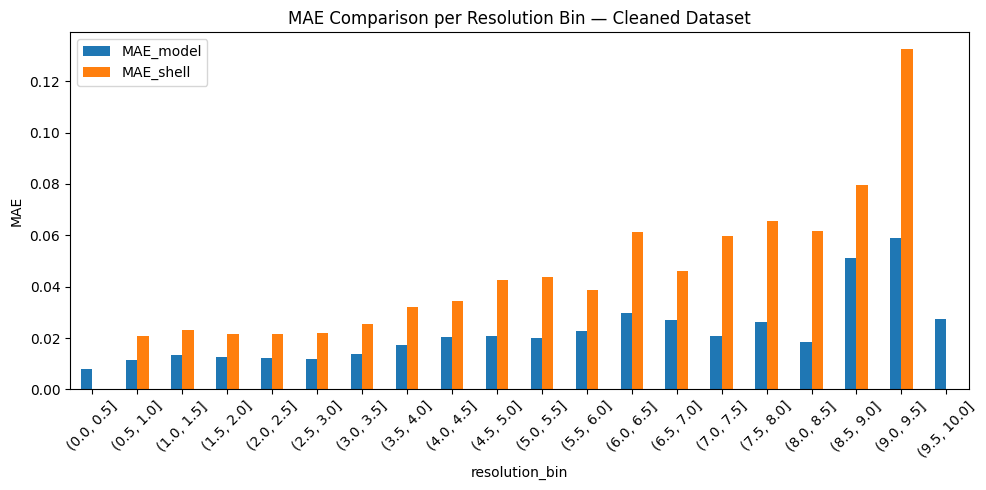

In [59]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = pd.read_excel('/content/drive/MyDrive/ML assessment/Ml 2/rr/cleaned_data.xlsx')

# Define features
features = ['resolution', 'Solvent_content', 'cell_volume', 'temperature', 'WilsonBestimate', 'DataCompleteness']

# Filter out rows with missing values in features and target
train_data = df_clean.dropna(subset=features + ['r_free'])

X = train_data[features]
y = train_data['r_free']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model_full = RandomForestRegressor(random_state=42)
model_full.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model_full.predict(X_test_scaled)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2:", r2_score(y_test, y_pred))

def compare_model_vs_shell_median(df_input, model, target='r_free', label='Full Dataset'):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_absolute_error

    # Load your dataset
    df = pd.read_excel('/content/drive/MyDrive/ML assessment/Ml 2/rr/cleaned_data.xlsx')

    print(f"\n Comparing model vs shell-median baseline — {label} — Target: {target}")


    # Define features and resolution bins
    X_features = ['resolution', 'Solvent_content', 'cell_volume', 'temperature', 'WilsonBestimate','DataCompleteness']
    resolution_bins = np.arange(0, 10.5, 0.5)

    # Step 1: Make a clean copy and drop NaNs
    df = df_input.copy()
    df = df[X_features + [target]].dropna()

    # Step 2: Extract clean 1D resolution series
    resolution_series = df['resolution'].copy()
    df['resolution_bin'] = pd.cut(resolution_series, bins=resolution_bins)

    # Step 3: Prepare X and predict
    X = df[X_features]
    y = df[target]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    df['prediction'] = model.predict(X_scaled)

    # Step 4: Compute median per shell
    shell_medians = df.groupby('resolution_bin')[target].median()
    df['shell_median'] = df['resolution_bin'].map(shell_medians)

    # Step 5: Compute overall MAEs
    model_mae = mean_absolute_error(df[target], df['prediction'])
    shell_mae = mean_absolute_error(df[target], df['shell_median'])

    print(f" Model MAE:        {model_mae:.4f}")
    print(f" Shell Median MAE: {shell_mae:.4f}")

    # Step 6: Per-bin MAE comparison
    bin_errors = df.groupby('resolution_bin').apply(
        lambda group: pd.Series({
            'MAE_model': mean_absolute_error(group[target], group['prediction']),
            'MAE_shell': mean_absolute_error(group[target], group['shell_median'])
        })
    ).dropna()

    print("\nMAE by resolution bin:")
    print(bin_errors)

    # Step 7: Plot
    bin_errors.plot(kind='bar', figsize=(10, 5))
    plt.title(f"MAE Comparison per Resolution Bin — {label}")
    plt.ylabel("MAE")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

compare_model_vs_shell_median(df, model_full, target='r_free', label='Full Dataset')
compare_model_vs_shell_median(df_clean, model_clean, target='r_free', label='Cleaned Dataset')




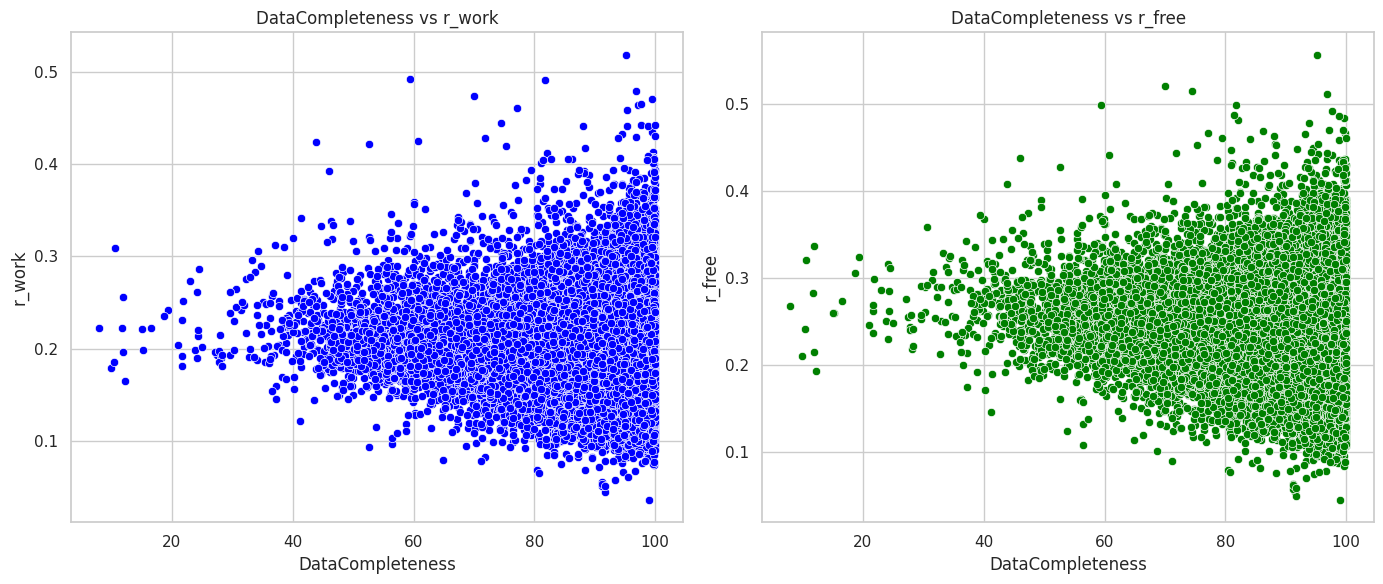

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
df = pd.read_excel('/content/drive/MyDrive/ML assessment/Ml 2/rr/data_cleaned.xlsx')

# Set Seaborn style
sns.set(style="whitegrid")

# Create scatter plots side by side
plt.figure(figsize=(14, 6))

# Scatter: DataCompleteness vs r_work
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='DataCompleteness', y='r_work', color='blue')
plt.title('DataCompleteness vs r_work')

# Scatter: DataCompleteness vs r_free
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='DataCompleteness', y='r_free', color='green')
plt.title('DataCompleteness vs r_free')

plt.tight_layout()
plt.show()


/tmp/ipython-input-4-3210233440.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


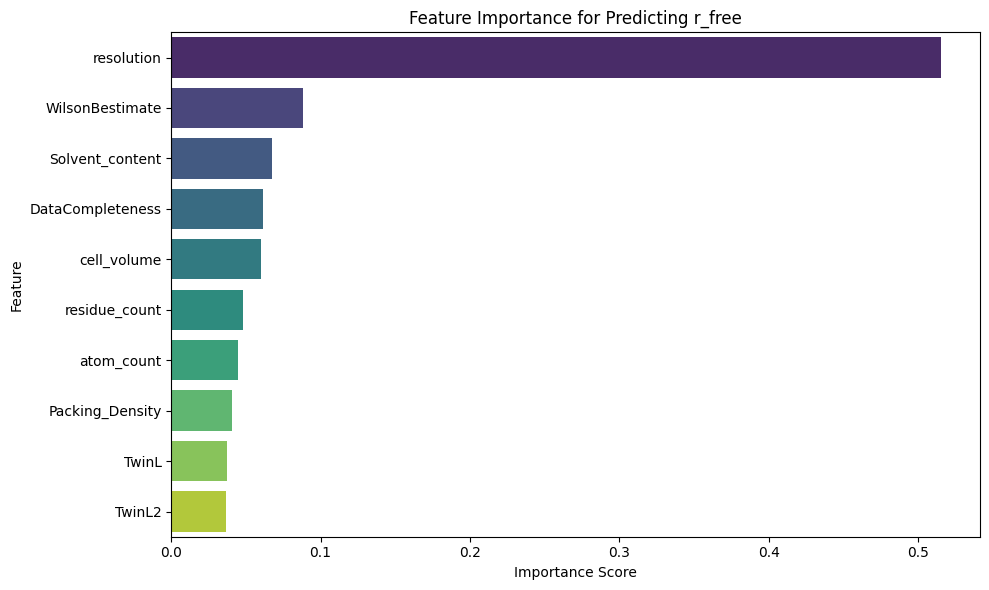

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the merged dataset
df = pd.read_excel('/content/drive/MyDrive/ML assessment/Ml 2/rr/data_cleaned.xlsx')

# Define numeric columns (features)
features = [
    'resolution', 'Solvent_content', 'cell_volume', 'Packing_Density',
    'atom_count', 'residue_count', 'WilsonBestimate', 'TwinL2', 'TwinL', 'DataCompleteness'
]

# Drop rows with missing values in the selected columns
df = df.dropna(subset=features + ['r_free'])

# Split into features (X) and target (y)
X = df[features]
y = df['r_free']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title('Feature Importance for Predicting r_free')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [1]:
pip install shap


In [2]:
import shap

# Create a TreeExplainer for RandomForest
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot: Shows overall feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed summary: Distribution of SHAP values per feature
shap.summary_plot(shap_values, X_test)


NameError: name 'model' is not defined

In [ ]:
# Show the first 10 columns of the DataFrame
print(df.iloc[:, :10].head())


  PDB_ID               method  resolution  r_work  r_free  Solvent_content  \
0   101m  'X-RAY DIFFRACTION'        2.07   0.157   0.202             60.2   
1   102m  'X-RAY DIFFRACTION'        1.84   0.159   0.203             60.2   
2   103m  'X-RAY DIFFRACTION'        2.07   0.158   0.216             60.3   
3   104m  'X-RAY DIFFRACTION'        1.71   0.154   0.225             34.3   
4   105m  'X-RAY DIFFRACTION'        2.02   0.174   0.268             33.0   

    cell_volume  Packing_Density  atom_count  residue_count  
0  334548.89380       236.764964        1413            295  
1  332669.23160       233.780205        1423            311  
2  334576.93090       240.876120        1389            272  
3   67178.80511        46.330210        1450            335  
4   65892.00086        47.541126        1386            271  


🔎 Feature Importances:
           Feature  Importance
6  WilsonBestimate    0.357584
0       resolution    0.197323
1  Solvent_content    0.074321
5    residue_count    0.072867
2      cell_volume    0.072236
4       atom_count    0.065190
3  Packing_Density    0.063926
8            TwinL    0.049773
7           TwinL2    0.046780


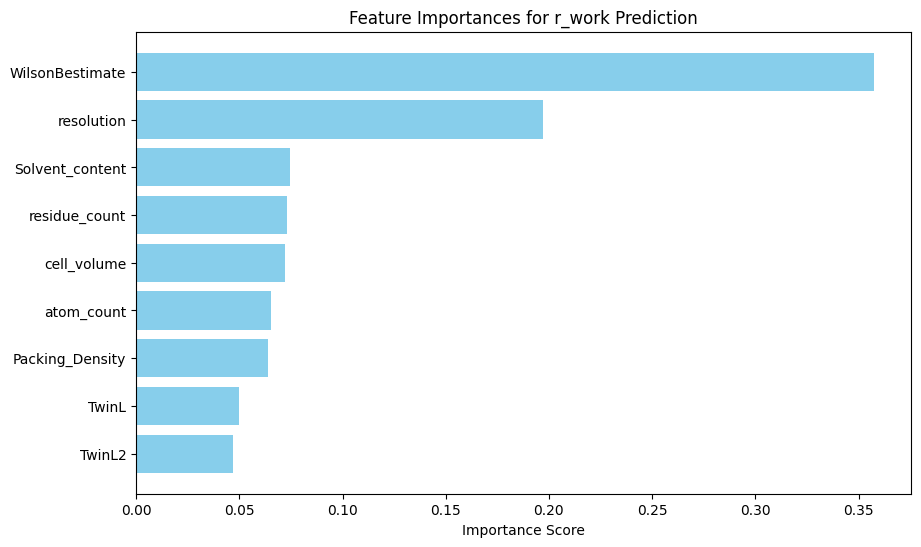

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 1. Select input features and target
feature_cols = [
    'resolution', 'Solvent_content', 'cell_volume', 'Packing_Density',
    'atom_count', 'residue_count', 'WilsonBestimate',
    'TwinL2', 'TwinL'
]

X = df[feature_cols]
y_work = df['r_work']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_work, test_size=0.2, random_state=42)

# 3. Fit the model
model_work = RandomForestRegressor(n_estimators=100, random_state=42)
model_work.fit(X_train, y_train)

# 4. Now it's safe to access feature importances
importances = model_work.feature_importances_

# 5. Display feature importance
import pandas as pd
import matplotlib.pyplot as plt

feature_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(" Feature Importances:")
print(feature_importance_df)

# 6. Optional: Plot
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importances for r_work Prediction')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Data ===
file_path = r"/content/drive/MyDrive/ML assessment/Ml 2/rr/merged_output_cleaned.xlsx"
df = pd.read_excel(file_path)

# === Feature Columns ===
feature_cols = [
    'resolution', 'Solvent_content', 'cell_volume',
    'Packing_Density', 'atom_count', 'residue_count',
    'WilsonBestimate', 'WilsonBaniso', 'TwinL2', 'TwinL'
]

# === Target Columns ===
targets = ['r_work', 'r_free']

# === Train-Test Split ===
X = df[feature_cols]
y_work = df['r_work']
y_free = df['r_free']

X_train, X_test, y_work_train, y_work_test = train_test_split(X, y_work, test_size=0.2, random_state=42)
_, _, y_free_train, y_free_test = train_test_split(X, y_free, test_size=0.2, random_state=42)

# === Model for r_work ===
model_work = RandomForestRegressor(n_estimators=100, random_state=42)
model_work.fit(X_train, y_work_train)
y_work_pred = model_work.predict(X_test)

# === Model for r_free ===
model_free = RandomForestRegressor(n_estimators=100, random_state=42)
model_free.fit(X_train, y_free_train)
y_free_pred = model_free.predict(X_test)

# === Evaluation ===
def evaluate_model(true, pred, label):
    print(f"📊 Evaluation for {label}")
    print(f"   R² Score: {r2_score(true, pred):.4f}")
    print(f"   RMSE    : {mean_squared_error(true, pred, squared=False):.4f}")
    print("")

evaluate_model(y_work_test, y_work_pred, "r_work")
evaluate_model(y_free_test, y_free_pred, "r_free")

# === Feature Importance Plot ===
def plot_importances(model, title):
    importances = model.feature_importances_
    feature_importance = pd.Series(importances, index=feature_cols)
    feature_importance.sort_values().plot(kind='barh', figsize=(8, 6))
    plt.title(f"Feature Importance for {title}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

plot_importances(model_work, "r_work Prediction")
plot_importances(model_free, "r_free Prediction")


ValueError: could not convert string to float: '20.847;17.998;20.214;0.0;0.0;0.0'

In [ ]:
!pip install gemmi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.3 MB/s eta 0:00:00


In [ ]:
import gemmi



# Replace this with the actual CIF or PDB file path
test_file = r"C:\Users\bmt526\Downloads\mmCIF_PDB\fy\9fya.cif.gz"
st = gemmi.read_structure(test_file)
print(st.cell.volume, st[0].count_atom_sites())



FileNotFoundError: [Errno 2] Failed to open C:\Users\bmt526\Downloads\mmCIF_PDB\fy\9fya.cif.gz: No such file or directory

In [ ]:
import os
import requests
from Bio.PDB.MMCIFParser import MMCIFParser

def download_mmcif(pdb_id, save_dir="mmcif_files"):
    os.makedirs(save_dir, exist_ok=True)
    pdb_id = pdb_id.lower()
    url = f"https://files.rcsb.org/download/{pdb_id}.cif"
    filepath = os.path.join(save_dir, f"{pdb_id}.cif")

    if not os.path.exists(filepath):
        print(f"Downloading {pdb_id}.cif...")
        response = requests.get(url)
        response.raise_for_status()
        with open(filepath, "wb") as f:
            f.write(response.content)
    else:
        print(f"{pdb_id}.cif already downloaded.")
    return filepath

def safe_float(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return None

def parse_mmcif_features(pdb_id):
    filepath = download_mmcif(pdb_id)

    # Parse structural info using Biopython MMCIFParser
    parser = MMCIFParser(QUIET=True)
    structure = parser.get_structure(pdb_id, filepath)

    features = {}

    # Extract unit cell parameters and space group from header
    mmcif_dict = parser._mmcif_dict
    if '_cell.length_a' in mmcif_dict:
        features['a'] = safe_float(mmcif_dict['_cell.length_a'][0])
        features['b'] = safe_float(mmcif_dict['_cell.length_b'][0])
        features['c'] = safe_float(mmcif_dict['_cell.length_c'][0])
        features['alpha'] = safe_float(mmcif_dict['_cell.angle_alpha'][0])
        features['beta'] = safe_float(mmcif_dict['_cell.angle_beta'][0])
        features['gamma'] = safe_float(mmcif_dict['_cell.angle_gamma'][0])
    else:
        # Set None if missing
        features.update({k: None for k in ['a', 'b', 'c', 'alpha', 'beta', 'gamma']})

    # Space group info
    features['space_group'] = mmcif_dict.get('_symmetry.space_group_name_H-M', [None])[0]

    # Extract resolution from _refine.d_resolution_high or _reflns.d_resolution_high
    resolution_keys = ['_refine.d_resolution_high', '_reflns.d_resolution_high']
    resolution = None
    for key in resolution_keys:
        if key in mmcif_dict:
            resolution = safe_float(mmcif_dict[key][0])
            if resolution is not None:
                break
    features['resolution'] = resolution

    # Extract R-work and R-free values from refinement info
    r_work_keys = ['_refine.ls_R_factor_R_work', '_refine_ls_R_factor_R_work']
    r_free_keys = ['_refine.ls_R_factor_R_free', '_refine_ls_R_factor_R_free']

    r_work = None
    for key in r_work_keys:
        if key in mmcif_dict:
            r_work = safe_float(mmcif_dict[key][0])
            if r_work is not None:
                break
    features['R_work'] = r_work

    r_free = None
    for key in r_free_keys:
        if key in mmcif_dict:
            r_free = safe_float(mmcif_dict[key][0])
            if r_free is not None:
                break
    features['R_free'] = r_free

    # Solvent content from _exptl_crystal.density_solvent
    solvent_content = mmcif_dict.get('_exptl_crystal.density_solvent', [None])[0]
    features['solvent_content'] = safe_float(solvent_content)

    # Wilson B-factor from _refine.pdbx_refine_hist_b_iso_Wilson
    wilson_b = mmcif_dict.get('_refine.pdbx_refine_hist_b_iso_Wilson', [None])[0]
    features['Wilson_B_factor'] = safe_float(wilson_b)

    return features


# Example usage
pdb_id = '100D'  # Replace with your PDB ID
features = parse_mmcif_features(pdb_id)
print(features)


{'a': 23.98, 'b': 40.77, 'c': 44.84, 'alpha': 90.0, 'beta': 90.0, 'gamma': 90.0, 'space_group': 'P 21 21 21', 'resolution': 1.9, 'R_work': 0.145, 'R_free': None, 'solvent_content': None, 'Wilson_B_factor': None}


In [ ]:
!pip install biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.9 MB/s eta 0:00:00


In [ ]:
from Bio.PDB.MMCIFParser import MMCIFParser


In [ ]:
import requests
import pandas as pd

# Example list of PDB IDs (replace with a larger curated list)
pdb_ids = ['100D','102L','102M','103L','104M','106M','107L','108L','109D','109L','109M','110D','110L','110M','111L','111M','112L','113L','114L','115D','115L','118D','118L','119L','11BG','120L','121P','122D','122L','123D','123L','125L','126D','126L','127D','127L','128L','129L','12E8','130L','131D','131L','132L','133D','133L','134L','135L','137D','137L','138D','138L','139L','13GS','141L','142L','143L','145D','145L','146L','147L','148L','151D','152D','152L','153L','154L','155L','156L','157D','157L','158D','158L','159D','159L','160D','160L','161D','161L','162L','163L','164L','165D','165L','166L','168D','16GS','16PK','172L','173L','17GS','180L','181D','181L','182D','182L','183D','183L','184D','184L','185L']  # Add 100–500 high-quality entries for better model

def fetch_metadata(pdb_id):
    url = f"https://data.rcsb.org/rest/v1/core/entry/{pdb_id}"
    r = requests.get(url)
    if r.status_code != 200:
        return None
    data = r.json()

    # Extracting basic structural features
    try:
        resolution = data['rcsb_entry_info']['resolution_combined'][0]
        r_work = data['rcsb_entry_info'].get('refinement_r_work', None)
        r_free = data['rcsb_entry_info'].get('refinement_r_free', None)
        release_date = data['rcsb_accession_info']['initial_release_date']
    except KeyError:
        return None

    return {
        "pdb_id": pdb_id,
        "resolution": resolution,
        "r_work": r_work,
        "r_free": r_free,
        "release_date": release_date
    }

# Fetch metadata for each PDB ID
records = []
for pid in pdb_ids:
    record = fetch_metadata(pid)
    if record:
        records.append(record)

df = pd.DataFrame(records)
print(df.head())


  pdb_id  resolution r_work r_free              release_date
0   100D        1.90   None   None  1995-03-31T00:00:00+0000
1   102L        1.74   None   None  1993-10-31T00:00:00+0000
2   102M        1.84   None   None  1998-04-08T00:00:00+0000
3   103L        1.90   None   None  1993-10-31T00:00:00+0000
4   104M        1.71   None   None  1998-04-08T00:00:00+0000


In [ ]:
import os
from Bio.PDB.MMCIF2Dict import MMCIF2Dict

def check_metadata(pdb_id, cif_path):
    try:
        mmcif_dict = MMCIF2Dict(cif_path)
        print(f"\n{pdb_id.upper()} METADATA:")
        print(f"Method: {mmcif_dict.get('_exptl.method', ['Unknown'])[0]}")

        # Check modern keys
        print("Modern keys:")
        for key in ['_refine.ls_d_res_high', '_refine.ls_R_factor_R_work']:
            exists = "✓" if key in mmcif_dict else "✗"
            print(f"  {exists} {key}")

        # Check legacy keys
        print("Legacy keys:")
        for key in ['_refine_hist.d_res_high', '_refine_ls_R_factor_obs']:
            exists = "✓" if key in mmcif_dict else "✗"
            print(f"  {exists} {key}")

        return True
    except Exception as e:
        print(f"Error checking {pdb_id}: {str(e)}")
        return False

# Check first 10 structures
for pdb_id in pdb_ids[:10]:
    cif_path = f"pdbs/{pdb_id}.cif"
    if not os.path.exists(cif_path):
        cif_path = f"pdbs/structures/{pdb_id[1:3]}/pdb{pdb_id}.cif"

    if os.path.exists(cif_path):
        check_metadata(pdb_id, cif_path)
    else:
        print(f"No CIF file for {pdb_id}")

No CIF file for 100D
No CIF file for 102L
No CIF file for 102M
No CIF file for 103L
No CIF file for 104M
No CIF file for 106M
No CIF file for 107L
No CIF file for 108L
No CIF file for 109D
No CIF file for 109L


In [ ]:
import os
import pandas as pd
from Bio.PDB.MMCIF2Dict import MMCIF2Dict
from Bio.PDB.PDBList import PDBList
from tqdm import tqdm
import subprocess
import sys
import importlib

# Install missing packages
required_packages = {
    'biopython': 'Bio',
    'tqdm': 'tqdm',
    'pandas': 'pandas'
}

for package, import_name in required_packages.items():
    try:
        importlib.import_module(import_name)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Re-import after installation
from Bio.PDB.MMCIF2Dict import MMCIF2Dict
from Bio.PDB.PDBList import PDBList

# Configure paths
DOWNLOAD_DIR = "pdbs"
os.makedirs(DOWNLOAD_DIR, exist_ok=True)

pdb_ids = [id.lower() for id in [
    '100D','102L','102M','103L','104M','106M','107L','108L','109D','109L',
    '109M','110D','110L','110M','111L','111M','112L','113L','114L','115D',
    '115L','118D','118L','119L','11BG','120L','121P','122D','122L','123D',
    '123L','125L','126D','126L','127D','127L','128L','129L','12E8','130L',
    '131D','131L','132L','133D','133L','134L','135L','137D','137L','138D',
    '138L','139L','13GS','141L','142L','143L','145D','145L','146L','147L',
    '148L','151D','152D','152L','153L','154L','155L','156L','157D','157L',
    '158D','158L','159D','159L','160D','160L','161D','161L','162L','163L',
    '164L','165D','165L','166L','168D','16GS','16PK','172L','173L','17GS',
    '180L','181D','181L','182D','182L','183D','183L','184D','184L','185L'
]]

# Download files with correct paths
pdbl = PDBList()
downloaded_files = {}

for pdb_id in tqdm(pdb_ids, desc="Downloading CIFs"):
    try:
        # Get the actual download path
        cif_path = pdbl.retrieve_pdb_file(
            pdb_id,
            file_format='mmCif',
            pdir=DOWNLOAD_DIR,
            overwrite=False
        )
        downloaded_files[pdb_id] = cif_path
        print(f"Downloaded {pdb_id} to {cif_path}")
    except Exception as e:
        print(f"Failed to download {pdb_id}: {str(e)}")
        downloaded_files[pdb_id] = None

def safe_float(value):
    try:
        return float(value) if value is not None else None
    except (TypeError, ValueError):
        return None

# Parse metadata with legacy key support
data = []
for pdb_id in tqdm(pdb_ids, desc="Parsing metadata"):
    cif_path = downloaded_files.get(pdb_id)

    if not cif_path or not os.path.exists(cif_path):
        # Try to find the file in Biopython's default structure
        subdir_path = os.path.join(
            DOWNLOAD_DIR,
            "structures",
            "divided",
            "mmCIF",
            pdb_id[1:3],
            f"pdb{pdb_id}.cif"
        )
        if os.path.exists(subdir_path):
            cif_path = subdir_path
        else:
            print(f"No CIF file found for {pdb_id}")
            continue

    try:
        mmcif_dict = MMCIF2Dict(cif_path)

        # Get experimental method
        method = mmcif_dict.get('_exptl.method', [""])[0].upper()

        # Initialize values
        resolution = r_work = r_free = None

        # Only get metrics for X-ray structures
        if "X-RAY" in method:
            # Modern keys
            resolution = safe_float(mmcif_dict.get('_refine.ls_d_res_high', [None])[0])
            r_work = safe_float(mmcif_dict.get('_refine.ls_R_factor_R_work', [None])[0])
            r_free = safe_float(mmcif_dict.get('_refine.ls_R_factor_R_free', [None])[0])

            # Legacy key fallbacks (for older structures)
            if resolution is None:
                resolution = safe_float(mmcif_dict.get('_refine_hist.d_res_high', [None])[0])
            if r_work is None:
                r_work = safe_float(mmcif_dict.get('_refine_ls_R_factor_obs', [None])[0])

        # Get optional fields
        b_factor = safe_float(mmcif_dict.get('_atom_sites.B_iso_mean', [None])[0])
        solvent = safe_float(mmcif_dict.get('_refine.solvent_content', [None])[0])
        cell_vol = safe_float(mmcif_dict.get('_cell.volume', [None])[0])

        # Only include entries with essential metadata
        if resolution is not None and r_work is not None:
            data.append({
                "pdb_id": pdb_id.upper(),
                "method": method,
                "resolution": resolution,
                "r_work": r_work,
                "r_free": r_free,
                "b_factor": b_factor,
                "solvent_content": solvent,
                "cell_volume": cell_vol
            })
    except Exception as e:
        print(f"Error parsing {pdb_id}: {str(e)}")

# Create DataFrame
if data:
    df = pd.DataFrame(data)
    print(f"\nSuccessfully parsed {len(df)} structures")
    print(df.head())
else:
    print("\nNo structures parsed successfully.")

Downloaded 100d to pdbs/100d.cif


Downloaded 102l to pdbs/102l.cif


Downloaded 102m to pdbs/102m.cif


Downloaded 103l to pdbs/103l.cif


Downloaded 104m to pdbs/104m.cif


Downloaded 106m to pdbs/106m.cif


Downloaded 107l to pdbs/107l.cif


Downloaded 108l to pdbs/108l.cif


Downloaded 109d to pdbs/109d.cif


Downloaded 109l to pdbs/109l.cif


Downloaded 109m to pdbs/109m.cif


Downloaded 110d to pdbs/110d.cif


Downloaded 110l to pdbs/110l.cif


Downloaded 110m to pdbs/110m.cif


Downloaded 111l to pdbs/111l.cif


Downloaded 111m to pdbs/111m.cif


Downloaded 112l to pdbs/112l.cif


Downloaded 113l to pdbs/113l.cif


Downloaded 114l to pdbs/114l.cif


Downloaded 115d to pdbs/115d.cif


Downloaded 115l to pdbs/115l.cif


Downloaded 118d to pdbs/118d.cif


Downloaded 118l to pdbs/118l.cif


Downloaded 119l to pdbs/119l.cif


Downloaded 11bg to pdbs/11bg.cif


Downloaded 120l to pdbs/120l.cif


Downloaded 121p to pdbs/121p.cif


Downloaded 122d to pdbs/122d.cif


Downloaded 122l to pdbs/122l.cif


Downloaded 123d to pdbs/123d.cif


Downloaded 123l to pdbs/123l.cif


Downloaded 125l to pdbs/125l.cif


Downloaded 126d to pdbs/126d.cif


Downloaded 126l to pdbs/126l.cif


Downloaded 127d to pdbs/127d.cif


Downloaded 127l to pdbs/127l.cif


Downloaded 128l to pdbs/128l.cif


Downloaded 129l to pdbs/129l.cif


Downloaded 12e8 to pdbs/12e8.cif


Downloaded 130l to pdbs/130l.cif


Downloaded 131d to pdbs/131d.cif


Downloaded 131l to pdbs/131l.cif


Downloaded 132l to pdbs/132l.cif


Downloaded 133d to pdbs/133d.cif


Downloaded 133l to pdbs/133l.cif


Downloaded 134l to pdbs/134l.cif


Downloaded 135l to pdbs/135l.cif


Downloaded 137d to pdbs/137d.cif


Downloaded 137l to pdbs/137l.cif


Downloaded 138d to pdbs/138d.cif


Downloaded 138l to pdbs/138l.cif


Downloaded 139l to pdbs/139l.cif


Downloaded 13gs to pdbs/13gs.cif


Downloaded 141l to pdbs/141l.cif


Downloaded 142l to pdbs/142l.cif


Downloaded 143l to pdbs/143l.cif


Downloaded 145d to pdbs/145d.cif


Downloaded 145l to pdbs/145l.cif


Downloaded 146l to pdbs/146l.cif


Downloaded 147l to pdbs/147l.cif


Downloaded 148l to pdbs/148l.cif


Downloaded 151d to pdbs/151d.cif


Downloaded 152d to pdbs/152d.cif


Downloaded 152l to pdbs/152l.cif


Downloaded 153l to pdbs/153l.cif


Downloaded 154l to pdbs/154l.cif


Downloaded 155l to pdbs/155l.cif


Downloaded 156l to pdbs/156l.cif


Downloaded 157d to pdbs/157d.cif


Downloaded 157l to pdbs/157l.cif


Downloaded 158d to pdbs/158d.cif


Downloaded 158l to pdbs/158l.cif


Downloaded 159d to pdbs/159d.cif


Downloaded 159l to pdbs/159l.cif


Downloaded 160d to pdbs/160d.cif


Downloaded 160l to pdbs/160l.cif


Downloaded 161d to pdbs/161d.cif


Downloaded 161l to pdbs/161l.cif


Downloaded 162l to pdbs/162l.cif


Downloaded 163l to pdbs/163l.cif


Downloaded 164l to pdbs/164l.cif


Downloaded 165d to pdbs/165d.cif


Downloaded 165l to pdbs/165l.cif


Downloaded 166l to pdbs/166l.cif


Downloaded 168d to pdbs/168d.cif


Downloaded 16gs to pdbs/16gs.cif


Downloaded 16pk to pdbs/16pk.cif


Downloaded 172l to pdbs/172l.cif


Downloaded 173l to pdbs/173l.cif


Downloaded 17gs to pdbs/17gs.cif


Downloaded 180l to pdbs/180l.cif


Downloaded 181d to pdbs/181d.cif


Downloaded 181l to pdbs/181l.cif


Downloaded 182d to pdbs/182d.cif


Downloaded 182l to pdbs/182l.cif


Downloaded 183d to pdbs/183d.cif


Downloaded 183l to pdbs/183l.cif


Downloaded 184d to pdbs/184d.cif


Downloaded 184l to pdbs/184l.cif


Downloaded 185l to pdbs/185l.cif


Parsing metadata: 100%|██████████| 100/100 [00:07<00:00, 14.16it/s]


Successfully parsed 26 structures
  pdb_id             method  resolution  r_work  r_free b_factor  \
0   100D  X-RAY DIFFRACTION        1.90   0.145     NaN     None   
1   102M  X-RAY DIFFRACTION        1.84   0.159   0.203     None   
2   104M  X-RAY DIFFRACTION        1.71   0.154   0.225     None   
3   106M  X-RAY DIFFRACTION        1.99   0.155   0.220     None   
4   109D  X-RAY DIFFRACTION        2.00   0.197     NaN     None   

  solvent_content cell_volume  
0            None        None  
1            None        None  
2            None        None  
3            None        None  
4            None        None  


Trying to do with one structure using mmcif

In [ ]:
!pip install biopython


In [ ]:
!pip install biopython pandas scikit-learn matplotlib seaborn tqdm


In [ ]:
from Bio.PDB import PDBList, PDBParser
import os
import pandas as pd
from tqdm import tqdm

pdb_ids = ['1IOM','1LH0','1NZA','1RFE','1UIR','1V6H','1VC4','1VGM','1WC2','1WCF','1WDD','1Y6L','1YH2','1ZDN','1ZKI','1ZO4','1ZOA','1ZUO','2A2A','2A4D','2A7L','2AD6','2AD7','2AD8','2ANR','2BC0','2BJS','2C6Q','2CGH','2CIC','2CMP','2CZQ','2D4U','2D5K','2DUC','2E0A','2E0C','2E0T','2EFV','2EJX','2EKP','2EKQ','2ERW','2ETX','2F3B','2F3D','2F4W','2FC3','2FYF','2HBA','2HBB','2HE7','2HLZ','2INB','2IPH','2JBZ','2JCA','2JJF','2NLV','2NQZ','2NSO','2NWV','2NXB','2NYI','2O8P','2O90','2OKF','2OKT','2OO1','2OSS','2OUO','2OY5','2OZT','2P5X','2PEV','2PF8','2PFH','2PGE','2PI3','2PMQ','2Q24','2Q3E','2QMO','2QMQ','2QS1','2QS2','2QS4','2QVD','2QYQ','2R7D','2RIV','2V1Z','2V20','2V2I','2V2L','2V2M','2V2N','2V2O','2V2P','2V2R']

pdbl = PDBList()
data = []

for pdb_id in tqdm(pdb_ids):
    pdb_file = pdbl.retrieve_pdb_file(pdb_id, file_format='pdb', pdir='pdbs')
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure(pdb_id, pdb_file)

    header = structure.header

    resolution = header.get("resolution")
    r_work = header.get("r_work")
    r_free = header.get("r_free")
    b_factor = header.get("b_iso_mean")
    cell = header.get("crystallographic_info", {})
    solvent_content = header.get("solvent_content")

    if None not in (resolution, r_work, r_free):
        data.append({
            "pdb_id": pdb_id,
            "resolution": resolution,
            "r_work": r_work,
            "r_free": r_free,
            "b_factor": b_factor,
            "solvent_content": solvent_content,
            "cell_volume": cell.get("cell_volume")
        })

df_trail = pd.DataFrame(data)
print(df_trail.head())


  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<01:24,  1.17it/s]

  2%|▏         | 2/100 [00:01<01:23,  1.18it/s]

  3%|▎         | 3/100 [00:02<01:08,  1.41it/s]

  4%|▍         | 4/100 [00:02<01:07,  1.42it/s]

  5%|▌         | 5/100 [00:04<01:24,  1.12it/s]

  6%|▌         | 6/100 [00:05<01:23,  1.13it/s]

  7%|▋         | 7/100 [00:06<01:28,  1.05it/s]

  8%|▊         | 8/100 [00:06<01:18,  1.18it/s]

  9%|▉         | 9/100 [00:07<01:17,  1.18it/s]

 10%|█         | 10/100 [00:08<01:08,  1.32it/s]

 11%|█         | 11/100 [00:09<01:13,  1.21it/s]

 12%|█▏        | 12/100 [00:09<01:12,  1.22it/s]

 13%|█▎        | 13/100 [00:10<01:04,  1.34it/s]

 14%|█▍        | 14/100 [00:11<00:57,  1.49it/s]

 15%|█▌        | 15/100 [00:11<00:55,  1.54it/s]

 16%|█▌        | 16/100 [00:12<01:00,  1.38it/s]

 17%|█▋        | 17/100 [00:13<01:06,  1.26it/s]

 18%|█▊        | 18/100 [00:14<01:03,  1.28it/s]

 19%|█▉        | 19/100 [00:15<01:11,  1.13it/s]

 20%|██        | 20/100 [00:16<01:06,  1.19it/s]

 21%|██        | 21/100 [00:16<01:03,  1.25it/s]

 22%|██▏       | 22/100 [00:17<01:11,  1.09it/s]

 23%|██▎       | 23/100 [00:18<01:12,  1.07it/s]

 24%|██▍       | 24/100 [00:19<01:07,  1.13it/s]

 25%|██▌       | 25/100 [00:20<01:05,  1.15it/s]

 26%|██▌       | 26/100 [00:21<00:59,  1.24it/s]

 27%|██▋       | 27/100 [00:21<00:57,  1.28it/s]

 28%|██▊       | 28/100 [00:23<01:10,  1.02it/s]

 29%|██▉       | 29/100 [00:24<01:04,  1.10it/s]

 30%|███       | 30/100 [00:24<00:59,  1.17it/s]

 31%|███       | 31/100 [00:25<00:53,  1.30it/s]

 32%|███▏      | 32/100 [00:26<00:54,  1.26it/s]

 33%|███▎      | 33/100 [00:26<00:49,  1.34it/s]

 34%|███▍      | 34/100 [00:27<00:52,  1.26it/s]

 35%|███▌      | 35/100 [00:28<00:56,  1.14it/s]

 36%|███▌      | 36/100 [00:29<00:56,  1.14it/s]

 37%|███▋      | 37/100 [00:30<00:59,  1.07it/s]

 38%|███▊      | 38/100 [00:31<00:51,  1.20it/s]

 39%|███▉      | 39/100 [00:31<00:44,  1.38it/s]

 40%|████      | 40/100 [00:32<00:41,  1.46it/s]

 41%|████      | 41/100 [00:33<00:40,  1.47it/s]

 42%|████▏     | 42/100 [00:34<00:44,  1.31it/s]

 43%|████▎     | 43/100 [00:34<00:39,  1.43it/s]

 44%|████▍     | 44/100 [00:35<00:38,  1.44it/s]

 45%|████▌     | 45/100 [00:36<00:39,  1.41it/s]

 46%|████▌     | 46/100 [00:36<00:38,  1.40it/s]

 47%|████▋     | 47/100 [00:37<00:37,  1.42it/s]

 48%|████▊     | 48/100 [00:37<00:32,  1.62it/s]

 49%|████▉     | 49/100 [00:38<00:36,  1.39it/s]

 50%|█████     | 50/100 [00:39<00:35,  1.39it/s]

 51%|█████     | 51/100 [00:40<00:36,  1.34it/s]

 52%|█████▏    | 52/100 [00:41<00:34,  1.37it/s]

 53%|█████▎    | 53/100 [00:42<00:37,  1.27it/s]

 54%|█████▍    | 54/100 [00:42<00:33,  1.38it/s]

 55%|█████▌    | 55/100 [00:43<00:32,  1.40it/s]

 56%|█████▌    | 56/100 [00:43<00:27,  1.62it/s]

 57%|█████▋    | 57/100 [00:44<00:27,  1.56it/s]

 58%|█████▊    | 58/100 [00:45<00:28,  1.49it/s]

 59%|█████▉    | 59/100 [00:45<00:29,  1.40it/s]

 60%|██████    | 60/100 [00:46<00:30,  1.30it/s]

 61%|██████    | 61/100 [00:47<00:30,  1.26it/s]

 62%|██████▏   | 62/100 [00:48<00:27,  1.37it/s]

 63%|██████▎   | 63/100 [00:48<00:26,  1.39it/s]

 64%|██████▍   | 64/100 [00:49<00:27,  1.32it/s]

 65%|██████▌   | 65/100 [00:50<00:26,  1.33it/s]

 66%|██████▌   | 66/100 [00:51<00:27,  1.24it/s]

 67%|██████▋   | 67/100 [00:52<00:24,  1.32it/s]

 68%|██████▊   | 68/100 [00:53<00:25,  1.25it/s]

 69%|██████▉   | 69/100 [00:53<00:25,  1.21it/s]

 70%|███████   | 70/100 [00:54<00:24,  1.24it/s]

 71%|███████   | 71/100 [00:55<00:21,  1.34it/s]

 72%|███████▏  | 72/100 [00:55<00:20,  1.37it/s]

 73%|███████▎  | 73/100 [00:56<00:19,  1.38it/s]

 74%|███████▍  | 74/100 [00:57<00:18,  1.38it/s]

 75%|███████▌  | 75/100 [00:58<00:18,  1.32it/s]

 76%|███████▌  | 76/100 [00:59<00:19,  1.24it/s]

 77%|███████▋  | 77/100 [01:00<00:20,  1.14it/s]

 78%|███████▊  | 78/100 [01:01<00:18,  1.16it/s]

 79%|███████▉  | 79/100 [01:01<00:16,  1.25it/s]

 80%|████████  | 80/100 [01:02<00:16,  1.19it/s]

 81%|████████  | 81/100 [01:03<00:15,  1.25it/s]

 82%|████████▏ | 82/100 [01:04<00:19,  1.06s/it]

 83%|████████▎ | 83/100 [01:05<00:16,  1.05it/s]

 84%|████████▍ | 84/100 [01:06<00:13,  1.17it/s]

 85%|████████▌ | 85/100 [01:07<00:12,  1.23it/s]

 86%|████████▌ | 86/100 [01:07<00:11,  1.19it/s]

 87%|████████▋ | 87/100 [01:09<00:12,  1.06it/s]

 88%|████████▊ | 88/100 [01:09<00:10,  1.19it/s]

 89%|████████▉ | 89/100 [01:10<00:08,  1.30it/s]

 90%|█████████ | 90/100 [01:11<00:08,  1.18it/s]

 91%|█████████ | 91/100 [01:12<00:07,  1.22it/s]

 92%|█████████▏| 92/100 [01:12<00:06,  1.28it/s]

 93%|█████████▎| 93/100 [01:13<00:05,  1.30it/s]

 94%|█████████▍| 94/100 [01:14<00:04,  1.40it/s]

 95%|█████████▌| 95/100 [01:14<00:03,  1.39it/s]

 96%|█████████▌| 96/100 [01:15<00:02,  1.44it/s]

 97%|█████████▋| 97/100 [01:15<00:01,  1.65it/s]

 98%|█████████▊| 98/100 [01:16<00:01,  1.73it/s]

 99%|█████████▉| 99/100 [01:17<00:00,  1.58it/s]

100%|██████████| 100/100 [01:17<00:00,  1.29it/s]

Empty DataFrame
Columns: []
Index: []


In [ ]:
print(f"Successfully parsed: {len(df)} structures")
print(df_trail.head())
print(df_trail.isnull().sum())

The issue can be that the structures are old and thats why we are not getting the output. Lets take structure which are <=2011

First check is all the structure xrays

In [ ]:
import requests

def get_experimental_method(pdb_id):
    url = f"https://data.rcsb.org/rest/v1/core/entry/{pdb_id.lower()}"
    try:
        r = requests.get(url)
        if r.status_code == 200:
            data = r.json()
            methods = data.get('exptl', [])
            return [m.get('method') for m in methods]
        else:
            print(f"{pdb_id}: HTTP {r.status_code}")
            return []
    except Exception as e:
        print(f"Error for {pdb_id}: {e}")
        return []

# Example usage
pdb_ids = ['1IOM','1LH0','1NZA','1RFE','1UIR','1V6H','1VC4','1VGM','1WC2','1WCF','1WDD','1Y6L','1YH2','1ZDN','1ZKI','1ZO4','1ZOA','1ZUO','2A2A','2A4D','2A7L','2AD6','2AD7','2AD8','2ANR','2BC0','2BJS','2C6Q','2CGH','2CIC','2CMP','2CZQ','2D4U','2D5K','2DUC','2E0A','2E0C','2E0T','2EFV','2EJX','2EKP','2EKQ','2ERW','2ETX','2F3B','2F3D','2F4W','2FC3','2FYF','2HBA','2HBB','2HE7','2HLZ','2INB','2IPH','2JBZ','2JCA','2JJF','2NLV','2NQZ','2NSO','2NWV','2NXB','2NYI','2O8P','2O90','2OKF','2OKT','2OO1','2OSS','2OUO','2OY5','2OZT','2P5X','2PEV','2PF8','2PFH','2PGE','2PI3','2PMQ','2Q24','2Q3E','2QMO','2QMQ','2QS1','2QS2','2QS4','2QVD','2QYQ','2R7D','2RIV','2V1Z','2V20','2V2I','2V2L','2V2M','2V2N','2V2O','2V2P','2V2R']
for pdb_id in pdb_ids:
    methods = get_experimental_method(pdb_id)
    print(f"{pdb_id}: {methods}")


1IOM: ['X-RAY DIFFRACTION']
1LH0: ['X-RAY DIFFRACTION']
1NZA: ['X-RAY DIFFRACTION']
1RFE: ['X-RAY DIFFRACTION']
1UIR: ['X-RAY DIFFRACTION']
1V6H: ['X-RAY DIFFRACTION']
1VC4: ['X-RAY DIFFRACTION']
1VGM: ['X-RAY DIFFRACTION']
1WC2: ['X-RAY DIFFRACTION']
1WCF: ['X-RAY DIFFRACTION']
1WDD: ['X-RAY DIFFRACTION']
1Y6L: ['X-RAY DIFFRACTION']
1YH2: ['X-RAY DIFFRACTION']
1ZDN: ['X-RAY DIFFRACTION']
1ZKI: ['X-RAY DIFFRACTION']
1ZO4: ['X-RAY DIFFRACTION']
1ZOA: ['X-RAY DIFFRACTION']
1ZUO: ['X-RAY DIFFRACTION']
2A2A: ['X-RAY DIFFRACTION']
2A4D: ['X-RAY DIFFRACTION']
2A7L: ['X-RAY DIFFRACTION']
2AD6: ['X-RAY DIFFRACTION']
2AD7: ['X-RAY DIFFRACTION']
2AD8: ['X-RAY DIFFRACTION']
2ANR: ['X-RAY DIFFRACTION']
2BC0: ['X-RAY DIFFRACTION']
2BJS: ['X-RAY DIFFRACTION']
2C6Q: ['X-RAY DIFFRACTION']
2CGH: ['X-RAY DIFFRACTION']
2CIC: ['X-RAY DIFFRACTION']
2CMP: ['X-RAY DIFFRACTION']
2CZQ: ['X-RAY DIFFRACTION']
2D4U: ['X-RAY DIFFRACTION']
2D5K: ['X-RAY DIFFRACTION']
2DUC: ['X-RAY DIFFRACTION']
2E0A: ['X-RAY DIFFRA

Replaced Biopython's downloader with direct RCSB downloads

Steps:

1. Ensure that the CIF files are downloaded correctly for each PDB ID.

2. Check that the MMCIF2Dict is reading the files without errors.

3. Verify that the metadata extraction (with both modern and legacy keys) is working.

In [ ]:
ls -lrt

total 2900
drwxr-xr-x 1 root root    4096 Jun 17 13:37 sample_data/
drwxr-xr-x 2 root root    4096 Jun 20 10:14 mmcif_files/
drwxr-xr-x 2 root root   12288 Jun 20 10:19 pdbs/
-rw-r--r-- 1 root root    4428 Jun 20 10:19 pdb_metadata.csv
-rw-r--r-- 1 root root 2940589 Jun 20 10:19 debug_reports.json


In [ ]:
ll

total 2900
-rw-r--r-- 1 root 2940589 Jun 20 10:19 debug_reports.json
drwxr-xr-x 2 root    4096 Jun 20 10:14 mmcif_files/
-rw-r--r-- 1 root    4428 Jun 20 10:19 pdb_metadata.csv
drwxr-xr-x 2 root   12288 Jun 20 10:19 pdbs/
drwxr-xr-x 1 root    4096 Jun 17 13:37 sample_data/


In [ ]:
pwd

'/content/sample_data'

In [ ]:
# Install required packages
import subprocess
import sys
import importlib

required_packages = {
    'biopython': 'Bio',
    'tqdm': 'tqdm',
    'pandas': 'pandas',
    'requests': 'requests'
}

for package, import_name in required_packages.items():
    try:
        importlib.import_module(import_name)
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Now import the modules
import os
import pandas as pd
import requests
import gzip
import shutil
from Bio.PDB.MMCIF2Dict import MMCIF2Dict
from tqdm import tqdm
import json

# Ensure directory exists
os.makedirs("pdbs", exist_ok=True)

# Example PDB IDs
pdb_ids = [id.lower() for id in [
    '1IOM','1LH0','1NZA','1RFE','1UIR','1V6H','1VC4','1VGM','1WC2','1WCF',
    '1WDD','1Y6L','1YH2','1ZDN','1ZKI','1ZO4','1ZOA','1ZUO','2A2A','2A4D',
    '2A7L','2AD6','2AD7','2AD8','2ANR','2BC0','2BJS','2C6Q','2CGH','2CIC',
    '2CMP','2CZQ','2D4U','2D5K','2DUC','2E0A','2E0C','2E0T','2EFV','2EJX',
    '2EKP','2EKQ','2ERW','2ETX','2F3B','2F3D','2F4W','2FC3','2FYF','2HBA',
    '2HBB','2HE7','2HLZ','2INB','2IPH','2JBZ','2JCA','2JJF','2NLV','2NQZ',
    '2NSO','2NWV','2NXB','2NYI','2O8P','2O90','2OKF','2OKT','2OO1','2OSS',
    '2OUO','2OY5','2OZT','2P5X','2PEV','2PF8','2PFH','2PGE','2PI3','2PMQ',
    '2Q24','2Q3E','2QMO','2QMQ','2QS1','2QS2','2QS4','2QVD','2QYQ','2R7D',
    '2RIV','2V1Z','2V20','2V2I','2V2L','2V2M','2V2N','2V2O','2V2P','2V2R'
]]


def download_cif(pdb_id):
    """Directly download CIF from RCSB with detailed diagnostics"""

    base_url = "https://files.rcsb.org/download/"
    local_path = os.path.join("pdbs", f"{pdb_id}.cif")

    # Skip if already exists
    if os.path.exists(local_path):
        print(f"{pdb_id}: Using existing file")
        return local_path

    try:
        # Try uncompressed CIF
        print(f"{pdb_id}: Trying uncompressed download...")
        response = requests.get(f"{base_url}{pdb_id}.cif", stream=True)
        response.raise_for_status()

        # Check if file is actually gzipped
        if response.headers.get('Content-Type') == 'application/x-gzip':
            print(f"{pdb_id}: Server returned gzip instead of cif")
            raise ValueError("Unexpected gzip content")

        with open(local_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"{pdb_id}: Downloaded uncompressed CIF")
        return local_path
    except Exception as e1:
        print(f"{pdb_id}: Uncompressed failed ({str(e1)}), trying compressed...")
        try:
            # Try compressed CIF
            response = requests.get(f"{base_url}{pdb_id}.cif.gz", stream=True)
            response.raise_for_status()
            gz_path = f"{local_path}.gz"

            with open(gz_path, 'wb') as f:
                for chunk in response.iter_content(chunk_size=8192):
                    f.write(chunk)

            # Extract GZIP
            with gzip.open(gz_path, 'rb') as f_in:
                with open(local_path, 'wb') as f_out:
                    shutil.copyfileobj(f_in, f_out)
            os.remove(gz_path)
            print(f"{pdb_id}: Downloaded and extracted gzipped CIF")
            return local_path
        except Exception as e2:
            print(f"{pdb_id}: All download attempts failed: {str(e2)}")
            return None

def safe_float(value):
    try:
        return float(value) if value is not None else None
    except (TypeError, ValueError):
        return None

def get_metadata(mmcif_dict, pdb_id):
    """Robust metadata extractor with detailed diagnostics"""
    # Create a debug report
    debug_info = {
        'pdb_id': pdb_id,
        'keys_present': [],
        'resolution_sources': [],
        'rwork_sources': []
    }

    # Get experimental method
    method = mmcif_dict.get('_exptl.method', [''])[0].upper()
    debug_info['method'] = method

    # Initialize results
    result = {
        'method': method,
        'resolution': None,
        'r_work': None,
        'r_free': None,
        'b_factor': None,
        'solvent_content': None,
        'cell_volume': None
    }

    # Track all keys present for debugging
    debug_info['keys_present'] = list(mmcif_dict.keys())

    # Resolution extraction with diagnostics
    modern_res_key = '_refine.ls_d_res_high'
    legacy_res_key = '_refine_hist.d_res_high'

    if modern_res_key in mmcif_dict:
        result['resolution'] = safe_float(mmcif_dict[modern_res_key][0])
        debug_info['resolution_sources'].append(f"modern: {result['resolution']}")
    elif legacy_res_key in mmcif_dict:
        result['resolution'] = safe_float(mmcif_dict[legacy_res_key][0])
        debug_info['resolution_sources'].append(f"legacy: {result['resolution']}")
    else:
        debug_info['resolution_sources'].append("not found")

    # R-work extraction with diagnostics
    modern_rwork_key = '_refine.ls_R_factor_R_work'
    legacy_rwork_key = '_refine_ls_R_factor_obs'

    if modern_rwork_key in mmcif_dict:
        result['r_work'] = safe_float(mmcif_dict[modern_rwork_key][0])
        debug_info['rwork_sources'].append(f"modern: {result['r_work']}")
    elif legacy_rwork_key in mmcif_dict:
        result['r_work'] = safe_float(mmcif_dict[legacy_rwork_key][0])
        debug_info['rwork_sources'].append(f"legacy: {result['r_work']}")
    else:
        debug_info['rwork_sources'].append("not found")

    # Other fields
    result['r_free'] = safe_float(mmcif_dict.get('_refine.ls_R_factor_R_free', [None])[0])
    result['b_factor'] = safe_float(mmcif_dict.get('_atom_sites.B_iso_mean', [None])[0]) #""From debugging : ===['_reflns.B_iso_Wilson_estimate'====, '_refine.B_iso_mean', '_atom_site.B_iso_or_equiv']""
    result['solvent_content'] = safe_float(mmcif_dict.get('_refine.solvent_content', [None])[0]) #_refine.solvent_content
    result['cell_volume'] = safe_float(mmcif_dict.get('_cell.volume', [None])[0])

    return result, debug_info

# ========== MAIN EXECUTION WITH DETAILED LOGGING ==========
# Download files
print("\n" + "="*50)
print("DOWNLOADING FILES")
print("="*50)
downloaded_files = {}
for pdb_id in pdb_ids:
    path = download_cif(pdb_id)
    downloaded_files[pdb_id] = path

# Parse metadata
print("\n" + "="*50)
print("PARSING METADATA")
print("="*50)
data = []
debug_reports = []
success_count = 0
failure_count = 0

for pdb_id in pdb_ids:
    print(f"\nProcessing {pdb_id.upper()}")
    cif_path = downloaded_files.get(pdb_id)

    if not cif_path or not os.path.exists(cif_path):
        print(f"SKIPPED: No CIF file available")
        failure_count += 1
        continue

    try:
        # Parse CIF file
        mmcif_dict = MMCIF2Dict(cif_path)

        # Extract metadata with debug info
        metadata, debug_info = get_metadata(mmcif_dict, pdb_id)
        debug_reports.append(debug_info)

        # Only require resolution and R-work
        if metadata['resolution'] is not None and metadata['r_work'] is not None:
            data.append({
                "pdb_id": pdb_id.upper(),
                **metadata
            })
            print(f"SUCCESS: Resolution={metadata['resolution']}, R_work={metadata['r_work']}")
            success_count += 1
        else:
            print(f"SKIPPED: Missing resolution or R-work")
            print(f"  Resolution sources: {debug_info['resolution_sources']}")
            print(f"  R-work sources: {debug_info['rwork_sources']}")
            failure_count += 1
    except Exception as e:
        print(f"ERROR: {str(e)}")
        failure_count += 1

# Create DataFrame
print("\n" + "="*50)
print("FINAL RESULTS")
print("="*50)
if data:
    df = pd.DataFrame(data)
    print(f"\nSuccessfully parsed {success_count} structures")
    print(f"Failed to parse {failure_count} structures")

    # Show method distribution
    print("\nMethod distribution:")
    print(df['method'].value_counts())


    # Save data
    df.to_csv("pdb_metadata.csv", index=False)
    print("\nSaved metadata to pdb_metadata.csv")

    # Save debug reports
    with open("debug_reports.json", "w") as f:
        json.dump(debug_reports, f, indent=2)
    print("Saved debug reports to debug_reports.json")
else:
    print("\nNo structures parsed successfully.")
    print(f"Success: {success_count}, Failures: {failure_count}")

print("\n" + "="*50)
print("DIAGNOSTIC SUMMARY")
print("="*50)
print(f"Total PDB IDs: {len(pdb_ids)}")
print(f"Files downloaded: {len([p for p in downloaded_files.values() if p])}")
print(f"Files parsed successfully: {success_count}")
print(f"Files failed: {failure_count}")


DOWNLOADING FILES
1iom: Trying uncompressed download...
1iom: Downloaded uncompressed CIF
1lh0: Trying uncompressed download...
1lh0: Downloaded uncompressed CIF
1nza: Trying uncompressed download...
1nza: Downloaded uncompressed CIF
1rfe: Trying uncompressed download...
1rfe: Downloaded uncompressed CIF
1uir: Trying uncompressed download...
1uir: Downloaded uncompressed CIF
1v6h: Trying uncompressed download...
1v6h: Downloaded uncompressed CIF
1vc4: Trying uncompressed download...
1vc4: Downloaded uncompressed CIF
1vgm: Trying uncompressed download...
1vgm: Downloaded uncompressed CIF
1wc2: Trying uncompressed download...
1wc2: Downloaded uncompressed CIF
1wcf: Trying uncompressed download...
1wcf: Downloaded uncompressed CIF
1wdd: Trying uncompressed download...
1wdd: Downloaded uncompressed CIF
1y6l: Trying uncompressed download...
1y6l: Downloaded uncompressed CIF
1yh2: Trying uncompressed download...
1yh2: Downloaded uncompressed CIF
1zdn: Trying uncompressed download...
1zdn: D

In [ ]:
import math

The mmCIF files don't contain these values

The keys we're using to extract them are incorrect

The values are stored differently in these specific structures

In [ ]:
def debug_mmcif_keys(cif_path, pdb_id):
    """Print available keys containing 'B_iso', 'solvent', or 'volume'"""
    mmcif_dict = MMCIF2Dict(cif_path)
    all_keys = list(mmcif_dict.keys())

    print(f"\nDebugging {pdb_id}:")
    print("Keys containing 'B_iso':")
    print([k for k in all_keys if 'B_iso' in k])

    print("Keys containing 'solvent':")
    print([k for k in all_keys if 'solvent' in k])

    print("Keys containing 'volume':")
    print([k for k in all_keys if 'volume' in k])

    print("Keys containing 'percent_sol':")
    print([k for k in all_keys if 'percent_sol' in k])

    print("Cell parameter keys:")
    cell_keys = ['_cell.length_a', '_cell.length_b', '_cell.length_c',
                 '_cell.angle_alpha', '_cell.angle_beta', '_cell.angle_gamma']
    for key in cell_keys:
        print(f"{key}: {mmcif_dict.get(key, ['Not found'])[0]}")68wgf

# Add this to your parsing loop after MMClF2Dict
debug_mmcif_keys(cif_path, pdb_id)

In [ ]:
def debug_mmcif_keys(cif_path, pdb_id):
    """Print available keys containing 'B_iso', 'solvent', or 'volume'"""
    try:
        mmcif_dict = MMCIF2Dict(cif_path)
    except Exception as e:
        print(f"Error reading MMCIF file {cif_path}: {e}")
        return

    all_keys = sorted(mmcif_dict.keys())

    print(f"\n--- Debugging {pdb_id} ---")
    print(f"Loaded mmCIF from: {cif_path}")
    print(f"Number of keys found: {len(all_keys)}\n")

    print("Keys containing 'B_iso':")
    print([k for k in all_keys if 'B_iso' in k])

    print("Keys containing 'solvent':")
    print([k for k in all_keys if 'solvent' in k])

    print("Keys containing 'volume':")
    print([k for k in all_keys if 'volume' in k])

    print("Keys containing 'percent_sol':")
    print([k for k in all_keys if 'percent_sol' in k])

    print("\nCell parameter keys:")
    cell_keys = ['_cell.length_a', '_cell.length_b', '_cell.length_c',
                 '_cell.angle_alpha', '_cell.angle_beta', '_cell.angle_gamma']
    for key in cell_keys:
        print(f"{key}: {mmcif_dict.get(key, ['Not found'])[0]}")


In [ ]:
import os
import pandas as pd
import requests
import gzip
import shutil
import math
from Bio.PDB.MMCIF2Dict import MMCIF2Dict
from tqdm import tqdm
import subprocess
import sys
import importlib

# Install required packages
required_packages = {
    'biopython': 'Bio',
    'tqdm': 'tqdm',
    'pandas': 'pandas'
}

for package, import_name in required_packages.items():
    try:
        importlib.import_module(import_name)
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Import after installation
from Bio.PDB.MMCIF2Dict import MMCIF2Dict

# Configure paths
DOWNLOAD_DIR = "pdbs"
os.makedirs(DOWNLOAD_DIR, exist_ok=True)

pdb_ids = [id.lower() for id in [
    '1IOM','1LH0','1NZA','1RFE','1UIR','1V6H','1VC4','1VGM','1WC2','1WCF',
    '1WDD','1Y6L','1YH2','1ZDN','1ZKI','1ZO4','1ZOA','1ZUO','2A2A','2A4D',
    '2A7L','2AD6','2AD7','2AD8','2ANR','2BC0','2BJS','2C6Q','2CGH','2CIC',
    '2CMP','2CZQ','2D4U','2D5K','2DUC','2E0A','2E0C','2E0T','2EFV','2EJX',
    '2EKP','2EKQ','2ERW','2ETX','2F3B','2F3D','2F4W','2FC3','2FYF','2HBA',
    '2HBB','2HE7','2HLZ','2INB','2IPH','2JBZ','2JCA','2JJF','2NLV','2NQZ',
    '2NSO','2NWV','2NXB','2NYI','2O8P','2O90','2OKF','2OKT','2OO1','2OSS',
    '2OUO','2OY5','2OZT','2P5X','2PEV','2PF8','2PFH','2PGE','2PI3','2PMQ',
    '2Q24','2Q3E','2QMO','2QMQ','2QS1','2QS2','2QS4','2QVD','2QYQ','2R7D',
    '2RIV','2V1Z','2V20','2V2I','2V2L','2V2M','2V2N','2V2O','2V2P','2V2R'
]]

def download_cif(pdb_id):
    """Directly download CIF from RCSB"""
    base_url = "https://files.rcsb.org/download/"
    local_path = os.path.join(DOWNLOAD_DIR, f"{pdb_id}.cif")

    if os.path.exists(local_path):
        return local_path

    try:
        # Try uncompressed CIF
        response = requests.get(f"{base_url}{pdb_id}.cif", stream=True)
        response.raise_for_status()
        with open(local_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        return local_path
    except:
        try:
            # Try compressed CIF
            response = requests.get(f"{base_url}{pdb_id}.cif.gz", stream=True)
            response.raise_for_status()
            gz_path = f"{local_path}.gz"
            with open(gz_path, 'wb') as f:
                for chunk in response.iter_content(chunk_size=8192):
                    f.write(chunk)

            # Extract GZIP
            with gzip.open(gz_path, 'rb') as f_in:
                with open(local_path, 'wb') as f_out:
                    shutil.copyfileobj(f_in, f_out)
            os.remove(gz_path)
            return local_path
        except Exception as e:
            print(f"Download failed for {pdb_id}: {str(e)}")
            return None

def safe_float(value):
    try:
        return float(value) if value is not None else None
    except (TypeError, ValueError):
        return None

def get_metadata(mmcif_dict, pdb_id):
    """Enhanced metadata extractor using the keys we found in debugging"""
    # Get experimental method
    method = mmcif_dict.get('_exptl.method', [''])[0].upper()

    # Initialize results
    result = {
        'method': method,
        'resolution': None,
        'r_work': None,
        'r_free': None,
        'b_factor': None,
        'solvent_content': None,
        'cell_volume': None
    }

    # 1. RESOLUTION
    if '_refine.ls_d_res_high' in mmcif_dict:
        result['resolution'] = safe_float(mmcif_dict['_refine.ls_d_res_high'][0])

    # 2. R-WORK
    if '_refine.ls_R_factor_R_work' in mmcif_dict:
        result['r_work'] = safe_float(mmcif_dict['_refine.ls_R_factor_R_work'][0])

    # 3. R-FREE
    if '_refine.ls_R_factor_R_free' in mmcif_dict:
        result['r_free'] = safe_float(mmcif_dict['_refine.ls_R_factor_R_free'][0])

    # 4. B-FACTOR - USE THE KEY WE FOUND IN DEBUGGING
    if '_refine.B_iso_mean' in mmcif_dict:
        result['b_factor'] = safe_float(mmcif_dict['_refine.B_iso_mean'][0])

    # 5. SOLVENT CONTENT - USE THE KEY WE FOUND IN DEBUGGING
    if '_exptl_crystal.density_percent_sol' in mmcif_dict:
        result['solvent_content'] = safe_float(mmcif_dict['_exptl_crystal.density_percent_sol'][0])

    # 6. CELL VOLUME - CALCULATE FROM PARAMETERS
    try:
        # Get cell parameters
        a = safe_float(mmcif_dict['_cell.length_a'][0])
        b = safe_float(mmcif_dict['_cell.length_b'][0])
        c = safe_float(mmcif_dict['_cell.length_c'][0])
        alpha = safe_float(mmcif_dict['_cell.angle_alpha'][0])
        beta = safe_float(mmcif_dict['_cell.angle_beta'][0])
        gamma = safe_float(mmcif_dict['_cell.angle_gamma'][0])

        # For cubic cells (all angles 90), volume = a * b * c
        if all(ang == 90.0 for ang in [alpha, beta, gamma]):
            result['cell_volume'] = a * b * c
        else:
            # Convert angles to radians
            alpha_rad = math.radians(alpha)
            beta_rad = math.radians(beta)
            gamma_rad = math.radians(gamma)

            # Calculate volume for triclinic cell
            volume = a * b * c * math.sqrt(
                1 - math.cos(alpha_rad)**2 - math.cos(beta_rad)**2 - math.cos(gamma_rad)**2 +
                2 * math.cos(alpha_rad) * math.cos(beta_rad) * math.cos(gamma_rad)
            )
            result['cell_volume'] = volume
    except Exception as e:
        print(f"  Volume calculation failed for {pdb_id}: {str(e)}")

    # Print extracted values for verification
    print(f"\nExtracted metadata for {pdb_id.upper()}:")
    print(f"  Resolution: {result['resolution']}")
    print(f"  R_work: {result['r_work']}")
    print(f"  B_factor: {result['b_factor']}")
    print(f"  Solvent: {result['solvent_content']}")
    print(f"  Cell Volume: {result['cell_volume']}")

    return result

# Download files
print("Downloading files...")
downloaded_files = {}
for pdb_id in tqdm(pdb_ids, desc="Downloading CIFs"):
    path = download_cif(pdb_id)
    downloaded_files[pdb_id] = path

# Parse metadata
print("\nParsing metadata...")
data = []
for pdb_id in tqdm(pdb_ids, desc="Parsing metadata"):
    cif_path = downloaded_files.get(pdb_id)
    if not cif_path or not os.path.exists(cif_path):
        print(f"Skipping {pdb_id}: CIF file not found")
        continue

    try:
        mmcif_dict = MMCIF2Dict(cif_path)
        metadata = get_metadata(mmcif_dict, pdb_id)

        # Only require resolution and R-work
        if metadata['resolution'] is not None and metadata['r_work'] is not None:
            data.append({
                "pdb_id": pdb_id.upper(),
                **metadata
            })
    except Exception as e:
        print(f"Error parsing {pdb_id}: {str(e)}")

# Create and display DataFrame
if data:
    df = pd.DataFrame(data)
    print(f"\nSuccessfully parsed {len(df)} structures")

    # Save to CSV
    df.to_csv("pdb_metadata.csv", index=False)
    print("Saved to pdb_metadata.csv")

    # Configure display to show all data
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)

    # Display all structures
    print("\nComplete Metadata for All Structures:")
    print(df)

    # Reset display options
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.max_colwidth')
else:
    print("\nNo structures parsed successfully.")

In [ ]:
# Add to installation section
required_packages['tabulate'] = 'tabulate'

# In the display section:
try:
    from tabulate import tabulate
    print("\nComplete Metadata for All Structures:")
    print(tabulate(df, headers='keys', tablefmt='psql', showindex=False))
except ImportError:
    # Fallback to pandas display if tabulate not available
    print("\nComplete Metadata for All Structures:")
    with pd.option_context('display.max_rows', None,
                           'display.max_columns', None,
                           'display.width', None,
                           'display.max_colwidth', None):
        print(df)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Check relationship between resolution and R-work
df.plot.scatter(x='resolution', y='r_work', title='Resolution vs R-work')

In [ ]:
print(df.isna().sum())


In [ ]:
print(df.corr(numeric_only=True))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

1. Resolution vs. R-work: 0.67
Moderate to strong positive correlation

Interpretation: Structures with higher resolution (worse) tend to have higher R-work (worse model fit).

-->This makes sense: poor resolution limits accurate model fitting, which raises R-work.

2. Resolution vs. R-free: 0.76
Strong positive correlation

Interpretation: Same as above, but even stronger — poor resolution also leads to worse R-free, which reflects overfitting risk in validation.

-->This aligns with expectations in crystallography: resolution directly impacts refinement quality.

3. R-work vs. R-free: 0.93
-->Extremely strong positive correlation

Interpretation: These two are directly tied. R-free is a subset of reflections not used in refinement, so they both reflect model fit, but R-free is stricter.

-->Typically, R-free is ~2-5% higher than R-work.